In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data
data = pd.read_csv('WEOOct2023all.csv')
data.dtypes 

year                                                                                    int64
country                                                                                object
country_code                                                                            int64
Gross domestic product, constant prices                                                object
Gross domestic product, constant prices.1                                              object
Gross domestic product, current prices                                                 object
Gross domestic product, current prices.1                                              float64
Gross domestic product, current prices.2                                              float64
Gross domestic product, deflator                                                       object
Gross domestic product per capita, constant prices                                     object
Gross domestic product per capita, constant prices.1        

In [3]:
data.replace('n/a', np.nan, inplace = True)
data.replace('', np.nan, inplace = True)
data.replace('--', np.nan, inplace = True)
data.describe()

year  country_code  Gross domestic product, current prices.1  \
count  9604.000000   9604.000000                               8770.000000   
mean   2004.000000    551.377551                                304.034028   
std      14.142872    261.496377                               1492.977738   
min    1980.000000    111.000000                                  0.014000   
25%    1992.000000    313.750000                                  3.605750   
50%    2004.000000    565.500000                                 18.516500   
75%    2016.000000    733.250000                                113.050500   
max    2028.000000    968.000000                              32690.370000   

       Gross domestic product, current prices.2  \
count                               8800.000000   
mean                                 454.167266   
std                                 1944.437899   
min                                    0.023000   
25%                                    8.478000   
50%                                   43.123000   
75%                                  226.503000   
max                                43889.880000   

       Gross domestic product per capita, constant prices.1  \
count                                        8681.000000      
mean                                        18076.594466      
std                                         20592.061704      
min                                           352.532000      
25%                                          3526.180000      
50%                                         10349.250000      
75%                                         26078.190000      
max                                        168229.700000      

       Gross domestic product per capita, current prices.1  \
count                                        8676.000000     
mean                                        10985.910653     
std                                         17534.950795     
min                                            17.116000     
25%                                          1088.317500     
50%                                          3612.490000     
75%                                         12724.120000     
max                                        154419.810000     

       Gross domestic product per capita, current prices.2  Total investment  \
count                                        8700.000000         7611.000000   
mean                                        16525.000542           24.093839   
std                                         21544.790028            9.899159   
min                                           185.863000          -10.180000   
25%                                          2790.710000           18.398500   
50%                                          8129.040000           23.035000   
75%                                         21184.670000           28.069500   
max                                        169698.500000          144.450000   

       Gross national savings  Unemployment rate   Employment   Population  \
count             7608.000000        4548.000000  1644.000000  8740.000000   
mean                20.622489           8.767620    12.136178    34.932347   
std                 11.786772           6.058653    24.157939   131.778552   
min                -98.140000           0.025000     0.040000     0.009000   
25%                 13.781750           4.838750     1.428500     1.769750   
50%                 20.434000           7.300000     3.683000     6.941500   
75%                 26.800500          10.876750    11.496500    22.800000   
max                120.552000          70.000000   161.889000  1491.670000   

       General government revenue.1  General government total expenditure.1  \
count                   7230.000000                             7177.000000   
mean                      28.975757                               31.776274   
std                       15.555495                            

In [4]:
plot_data = data.copy()
percentage_of_gdp_col_name = ['Current account balance.1', 'General government gross debt.1', 'General government net debt.1', 'General government primary net lending/borrowing.1', 'General government structural balance.1', 'General government net lending/borrowing.1', 'General government total expenditure.1', 'General government revenue.1']
plot_data = plot_data.drop(percentage_of_gdp_col_name, axis = 1)
plot_data = plot_data.drop('Inflation, average consumer prices.1', axis=1)
plot_data = plot_data.drop('Inflation, end of period consumer prices.1', axis=1)
print(len(plot_data.columns), len(data.columns))

37 47


In [5]:
num_col_name = []
not_gdp_num_col_name = []
for col in plot_data.columns:
    if col != 'country' and col != 'year':
        if plot_data[col].dtypes == 'object':
            plot_data[col] = plot_data[col].astype(float)
    if plot_data[col].dtypes == 'float':
        num_col_name.append(col)
        if 'Gross domestic product' not in col:
            not_gdp_num_col_name.append(col)
print(num_col_name)
plot_data.describe()

['Gross domestic product, constant prices', 'Gross domestic product, constant prices.1', 'Gross domestic product, current prices', 'Gross domestic product, current prices.1', 'Gross domestic product, current prices.2', 'Gross domestic product, deflator', 'Gross domestic product per capita, constant prices', 'Gross domestic product per capita, constant prices.1', 'Gross domestic product per capita, current prices', 'Gross domestic product per capita, current prices.1', 'Gross domestic product per capita, current prices.2', 'Output gap in percent of potential GDP', 'Gross domestic product based on purchasing-power-parity (PPP) share of world total', 'Implied PPP conversion rate', 'Total investment', 'Gross national savings', 'Inflation, average consumer prices', 'Inflation, end of period consumer prices', 'Volume of imports of goods and services', 'Volume of Imports of goods', 'Volume of exports of goods and services', 'Volume of exports of goods', 'Unemployment rate', 'Employment', 'Pop

year  country_code  Gross domestic product, constant prices  \
count  9604.000000   9604.000000                             8.737000e+03   
mean   2004.000000    551.377551                             1.309611e+05   
std      14.142872    261.496377                             1.049409e+06   
min    1980.000000    111.000000                             4.000000e-02   
25%    1992.000000    313.750000                             2.876800e+01   
50%    2004.000000    565.500000                             4.571640e+02   
75%    2016.000000    733.250000                             3.856570e+03   
max    2028.000000    968.000000                             1.807132e+07   

       Gross domestic product, constant prices.1  \
count                                8720.000000   
mean                                    3.380142   
std                                     6.003753   
min                                   -54.236000   
25%                                     1.403000   
50%                                     3.460000   
75%                                     5.692250   
max                                   147.973000   

       Gross domestic product, current prices  \
count                            8.693000e+03   
mean                             3.557834e+05   
std                              9.529373e+06   
min                              1.000000e-03   
25%                              1.650500e+01   
50%                              2.700530e+02   
75%                              2.819530e+03   
max                              5.586665e+08   

       Gross domestic product, current prices.1  \
count                               8770.000000   
mean                                 304.034028   
std                                 1492.977738   
min                                    0.014000   
25%                                    3.605750   
50%                                   18.516500   
75%                                  113.050500   
max                                32690.370000   

       Gross domestic product, current prices.2  \
count                               8800.000000   
mean                                 454.167266   
std                                 1944.437899   
min                                    0.023000   
25%                                    8.478000   
50%                                   43.123000   
75%                                  226.503000   
max                                43889.880000   

       Gross domestic product, deflator  \
count                      8.716000e+03   
mean                       8.154095e+11   
std                        5.624869e+13   
min                        1.000000e-03   
25%                        4.431275e+01   
50%                        8.457300e+01   
75%                        1.183123e+02   
max                        4.975160e+15   

       Gross domestic product per capita, constant prices  \
count                                       8.638000e+03    
mean                                        2.075440e+06    
std                                         1.236475e+07    
min                                         1.081100e+01    
25%                                         1.442724e+04    
50%                                         4.684099e+04    
75%                                         3.201310e+05    
max                                         1.986701e+08    

       Gross domestic product per capita, constant prices.1  ...   Population  \
count                                        8681.000000     ...  8740.000000   
mean                                        18076.594466     ...    34.932347   
std                                         20592.061704     ...   131.778552   
min                                           352.532000     ...     0.009000   
25%                                          3526.180000     ...     1.769750   
50%                                         10349.250000     ... 

In [6]:
corr_matrix = plot_data[num_col_name].corr()['Gross domestic product, current prices.1'].sort_values(ascending = False)
corr_matrix

Gross domestic product, current prices.1                                              1.000000
Gross domestic product, current prices.2                                              0.937955
Employment                                                                            0.907277
Gross domestic product based on purchasing-power-parity (PPP) share of world total    0.796539
Population                                                                            0.443970
Gross domestic product per capita, current prices.1                                   0.273771
Gross domestic product per capita, current prices.2                                   0.213095
Gross domestic product per capita, constant prices.1                                  0.203494
Gross national savings                                                                0.093345
Inflation, average consumer prices                                                    0.055029
Inflation, end of period consumer prices          

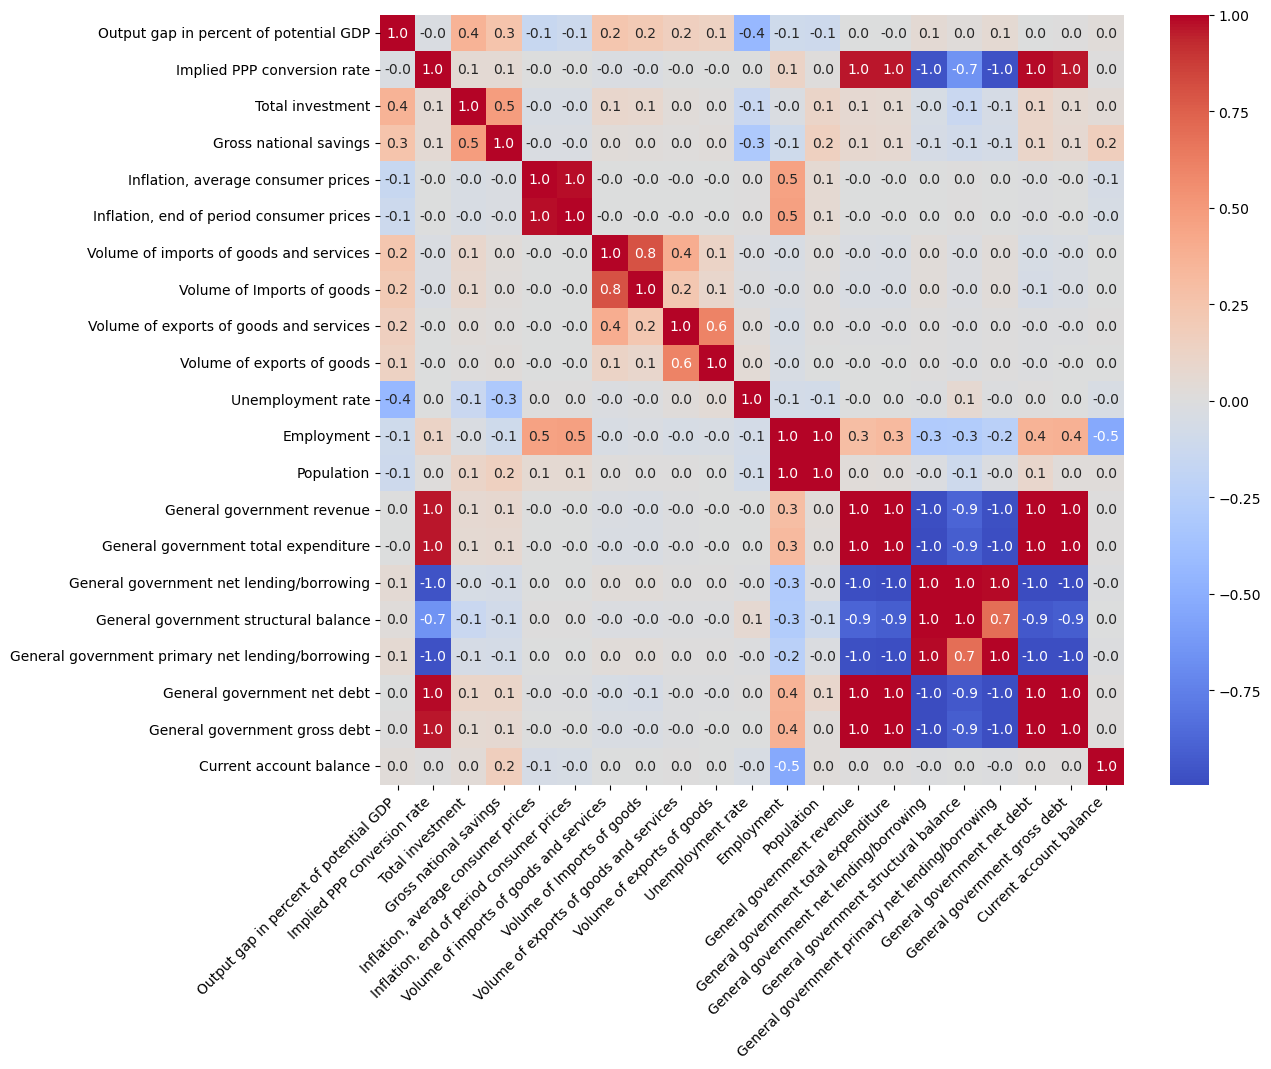

In [7]:
corr_matrix = plot_data[not_gdp_num_col_name].corr()
# draw the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.1f')
plt.xticks(rotation=45, ha='right')
plt.show()

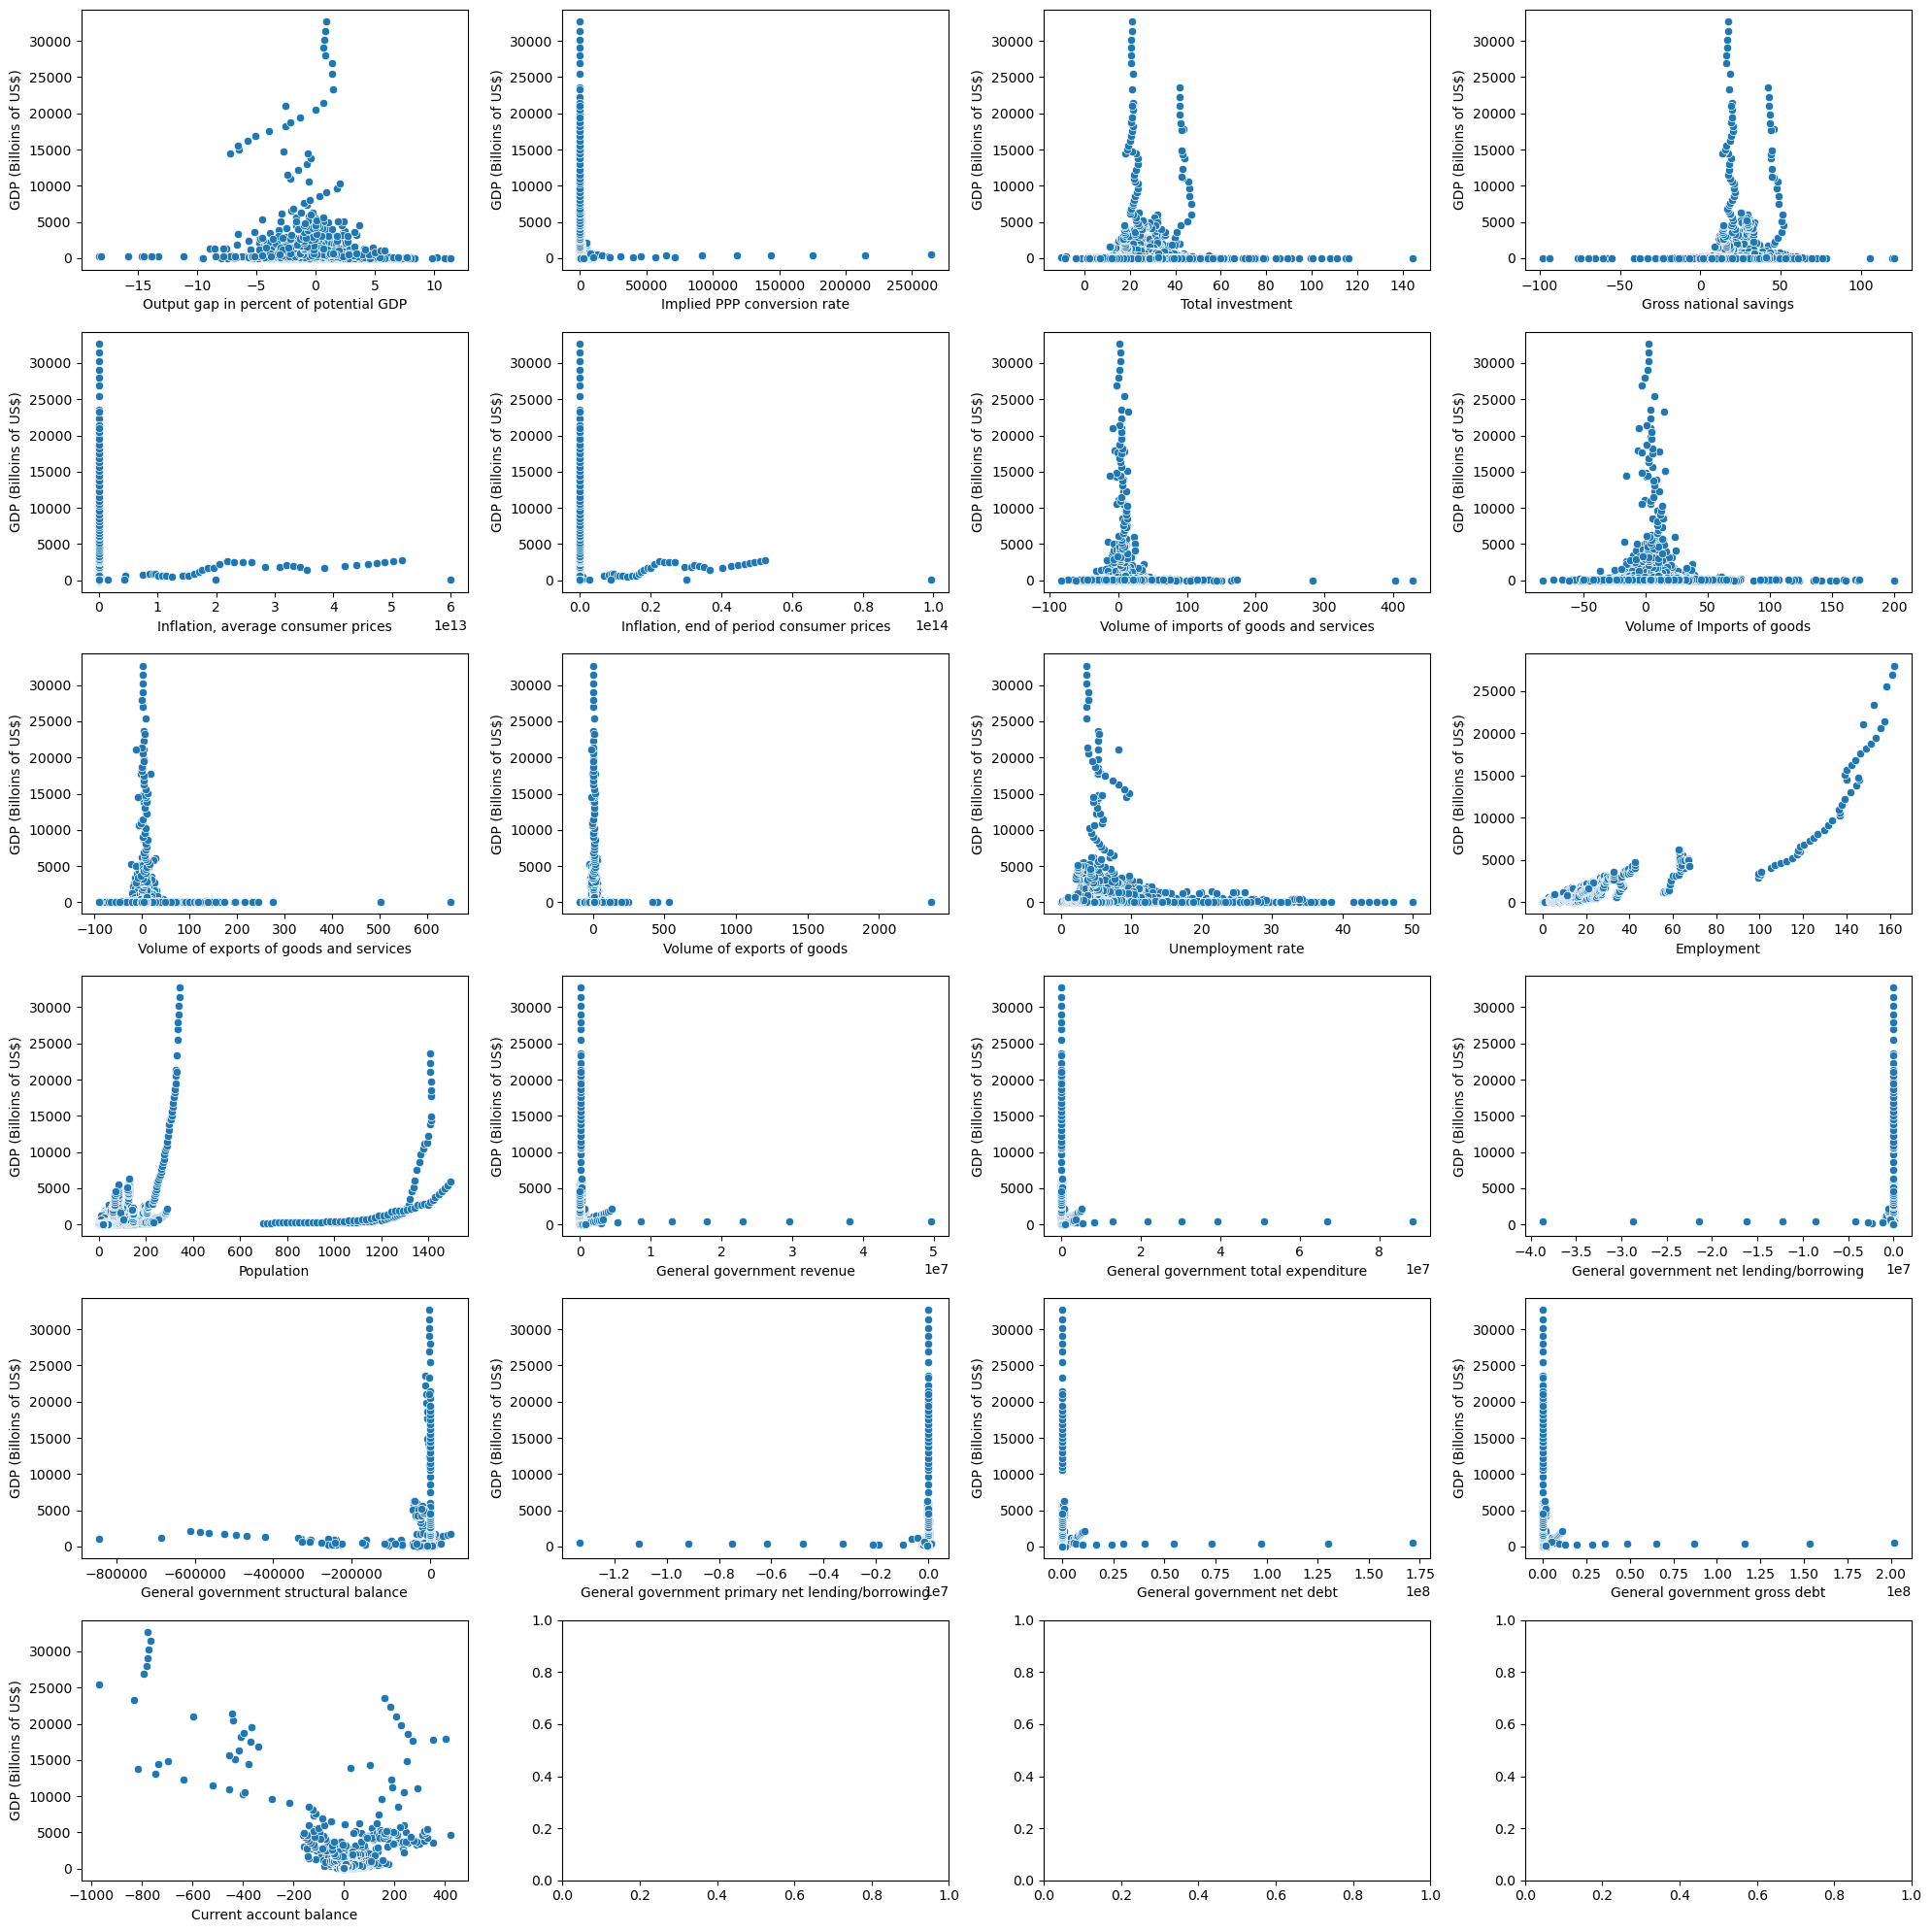

In [8]:
# Plot the one-sided triangle scatter plot
fig, ax = plt.subplots(6, 4, figsize=(20, 20))
for i in range(6):
    for j in range(4):
        if i*4+j >= len(not_gdp_num_col_name):
            break
        sns.scatterplot(data=plot_data, x=not_gdp_num_col_name[i*4+j], y='Gross domestic product, current prices.1', ax=ax[i, j])
        # set y-axis label
        ax[i, j].set_ylabel('GDP (Billoins of US$)')
plt.tight_layout()

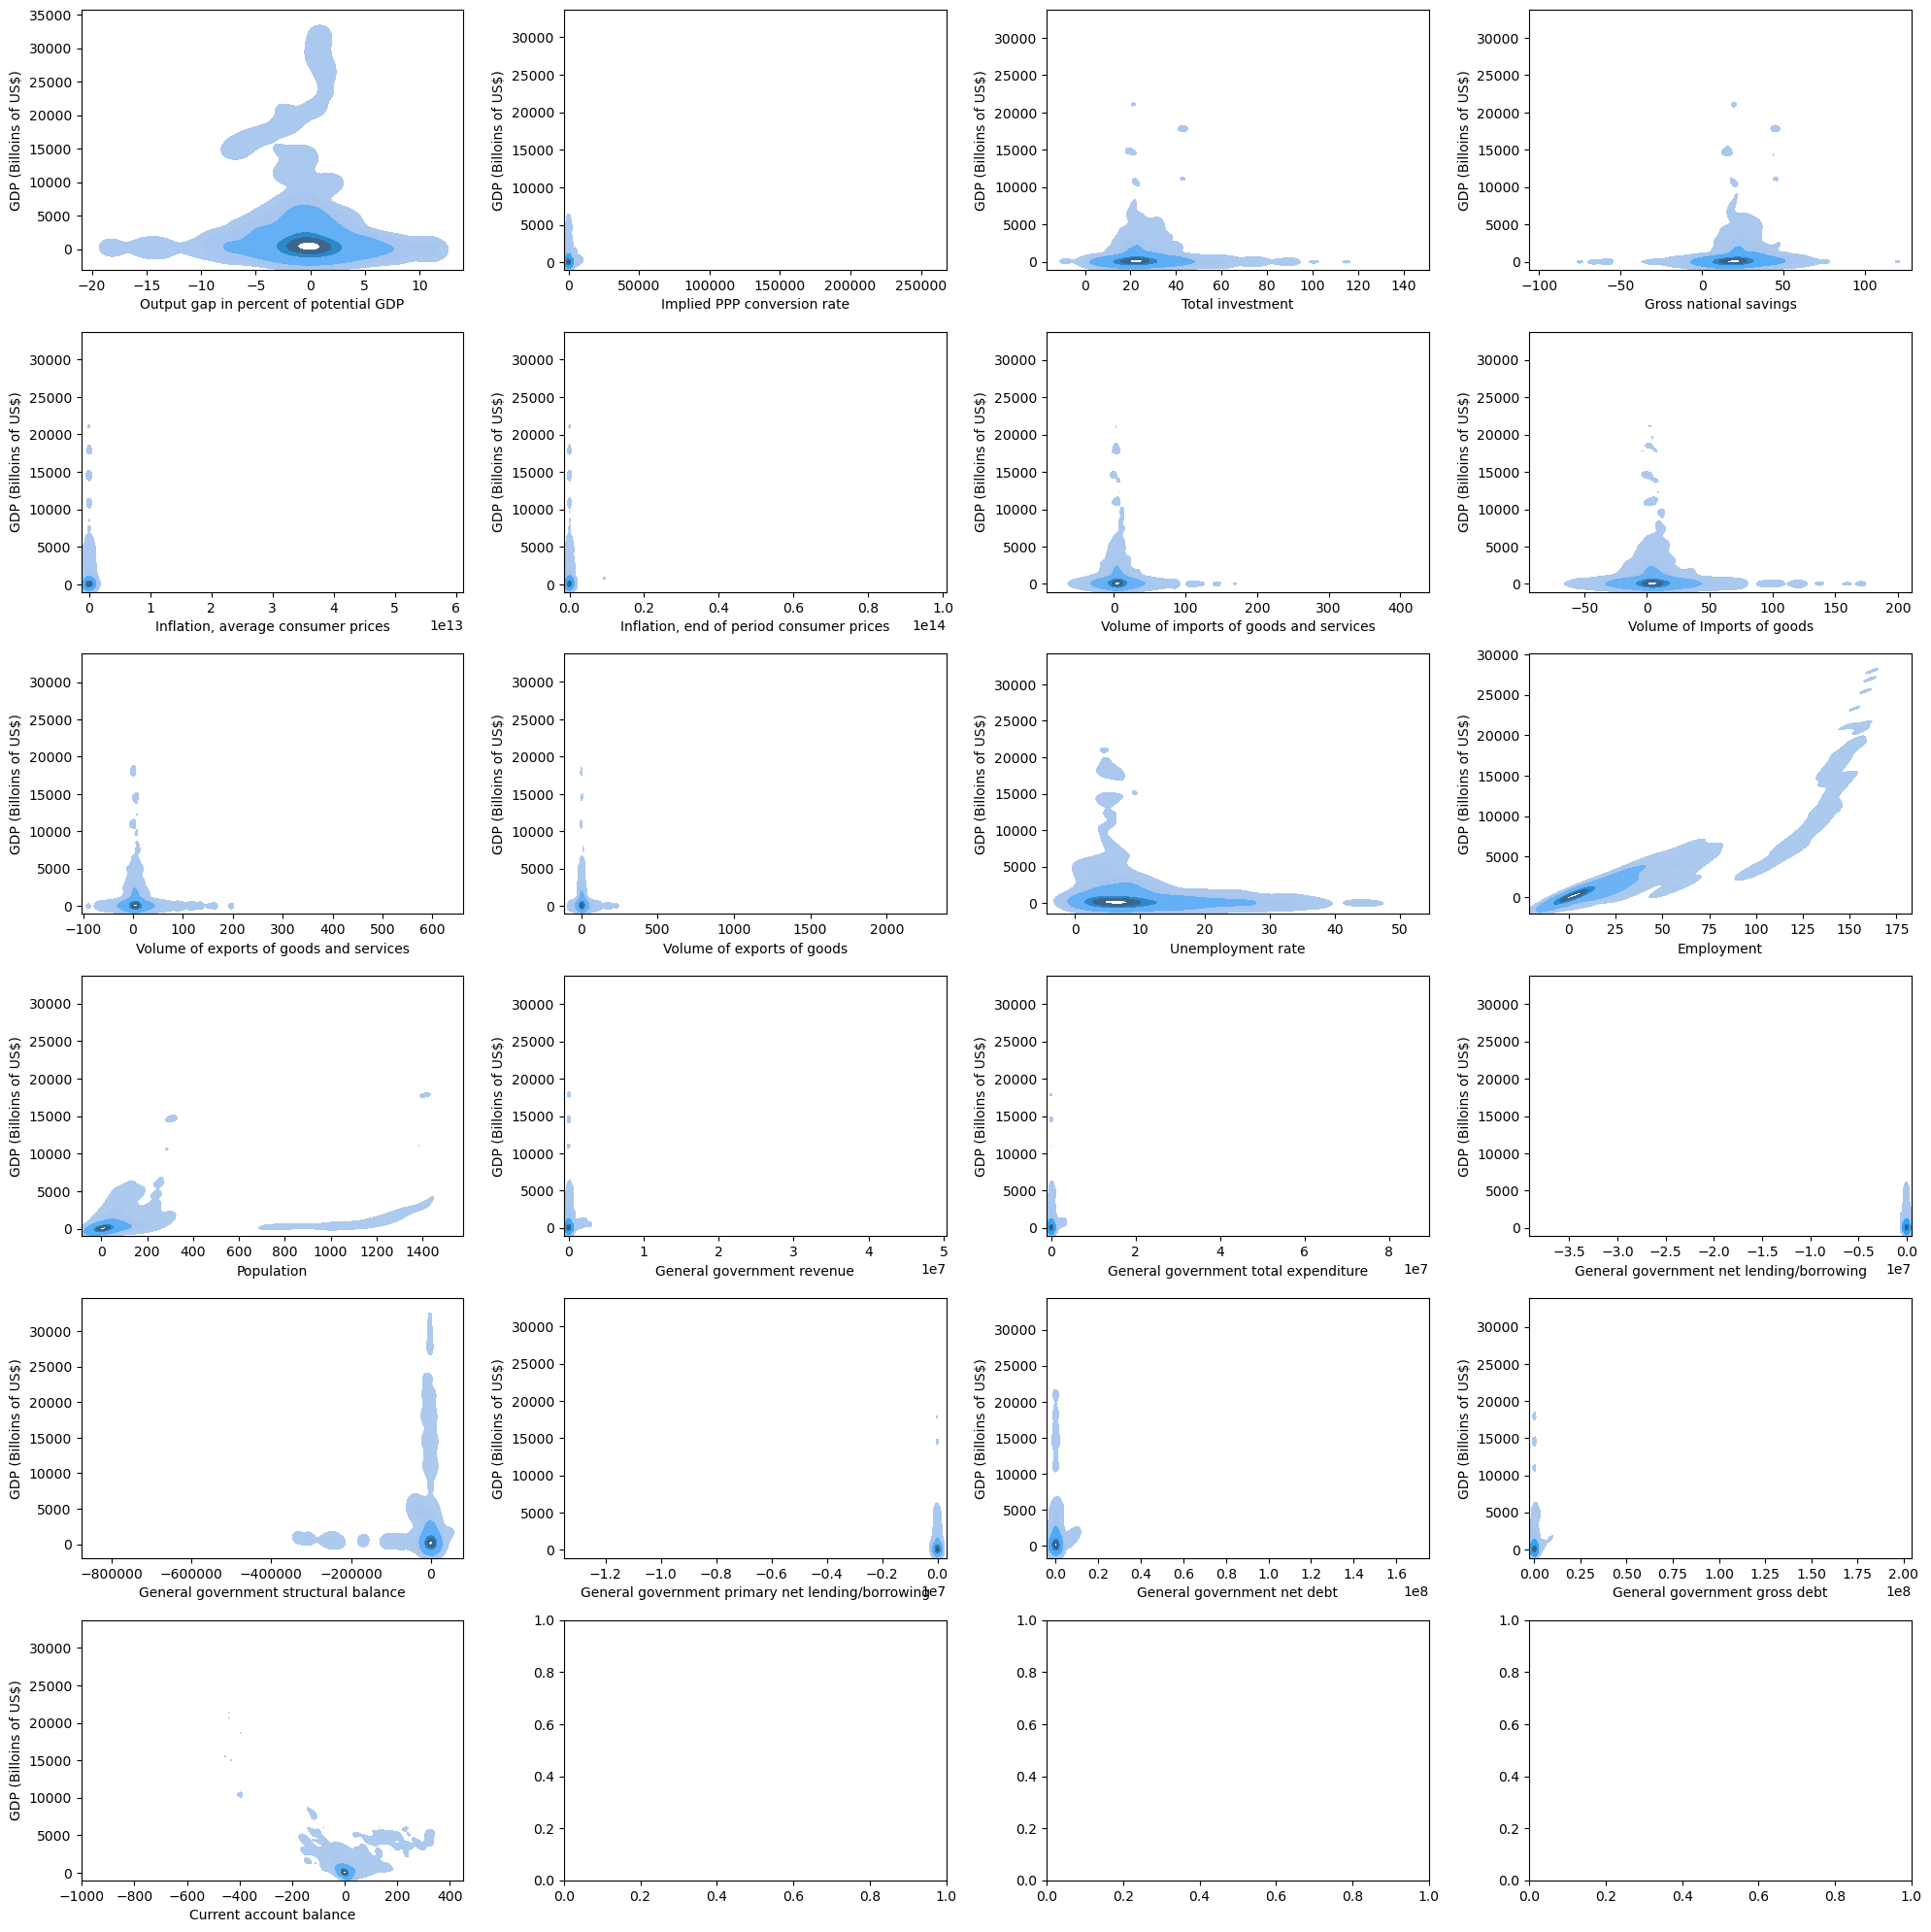

In [9]:
# Plot the one-sided triangle scatter plot with kde
fig, ax = plt.subplots(6, 4, figsize=(20, 20))
for i in range(6):
    for j in range(4):
        if i*4+j >= len(not_gdp_num_col_name):
            break
        sns.kdeplot(data=plot_data, x=not_gdp_num_col_name[i*4+j], y='Gross domestic product, current prices.1', ax=ax[i, j], levels=[0.01, 0.05, 0.1, 0.5, 0.7, 0.9], fill=True)
        # set y-axis label
        ax[i, j].set_ylabel('GDP (Billoins of US$)')
plt.tight_layout()

In [10]:
# Find the 10 highest 2020 GDP and GDP per capita countries
high_gdp_2020_country_list = plot_data[plot_data['year'] == 2020].sort_values(by=['Gross domestic product, current prices.1'], ascending=False)['country'][:10].tolist()
high_gdppc_2020_country_list = plot_data[plot_data['year'] == 2020].sort_values(by=['Gross domestic product per capita, current prices.1'], ascending=False)['country'][:10].tolist()
print(high_gdp_2020_country_list, high_gdppc_2020_country_list)

# Find the 10 lowest 2020 GDP and GDP per capita countries
low_gdp_2020_country_list = plot_data[plot_data['year'] == 2020].sort_values(by=['Gross domestic product, current prices.1'])['country'][:10].tolist()
low_gdppc_2020_country_list = plot_data[plot_data['year'] == 2020].sort_values(by=['Gross domestic product per capita, current prices.1'])['country'][:10].tolist()
print(low_gdp_2020_country_list, low_gdppc_2020_country_list)

['United States', 'China', 'Japan', 'Germany', 'United Kingdom', 'India', 'France', 'Italy', 'Canada', 'Korea'] ['Luxembourg', 'Switzerland', 'Ireland', 'Norway', 'United States', 'Singapore', 'Denmark', 'Iceland', 'Australia', 'Sweden']
['Tuvalu', 'Nauru', 'Kiribati', 'Marshall Islands', 'Palau', 'Micronesia', 'S鉶 Tom?and Pr韓cipe', 'Tonga', 'Dominica', 'Samoa'] ['Burundi', 'South Sudan', 'Mozambique', 'Madagascar', 'Central African Republic', 'Sierra Leone', 'Democratic Republic of the Congo', 'Malawi', 'Niger', 'Liberia']


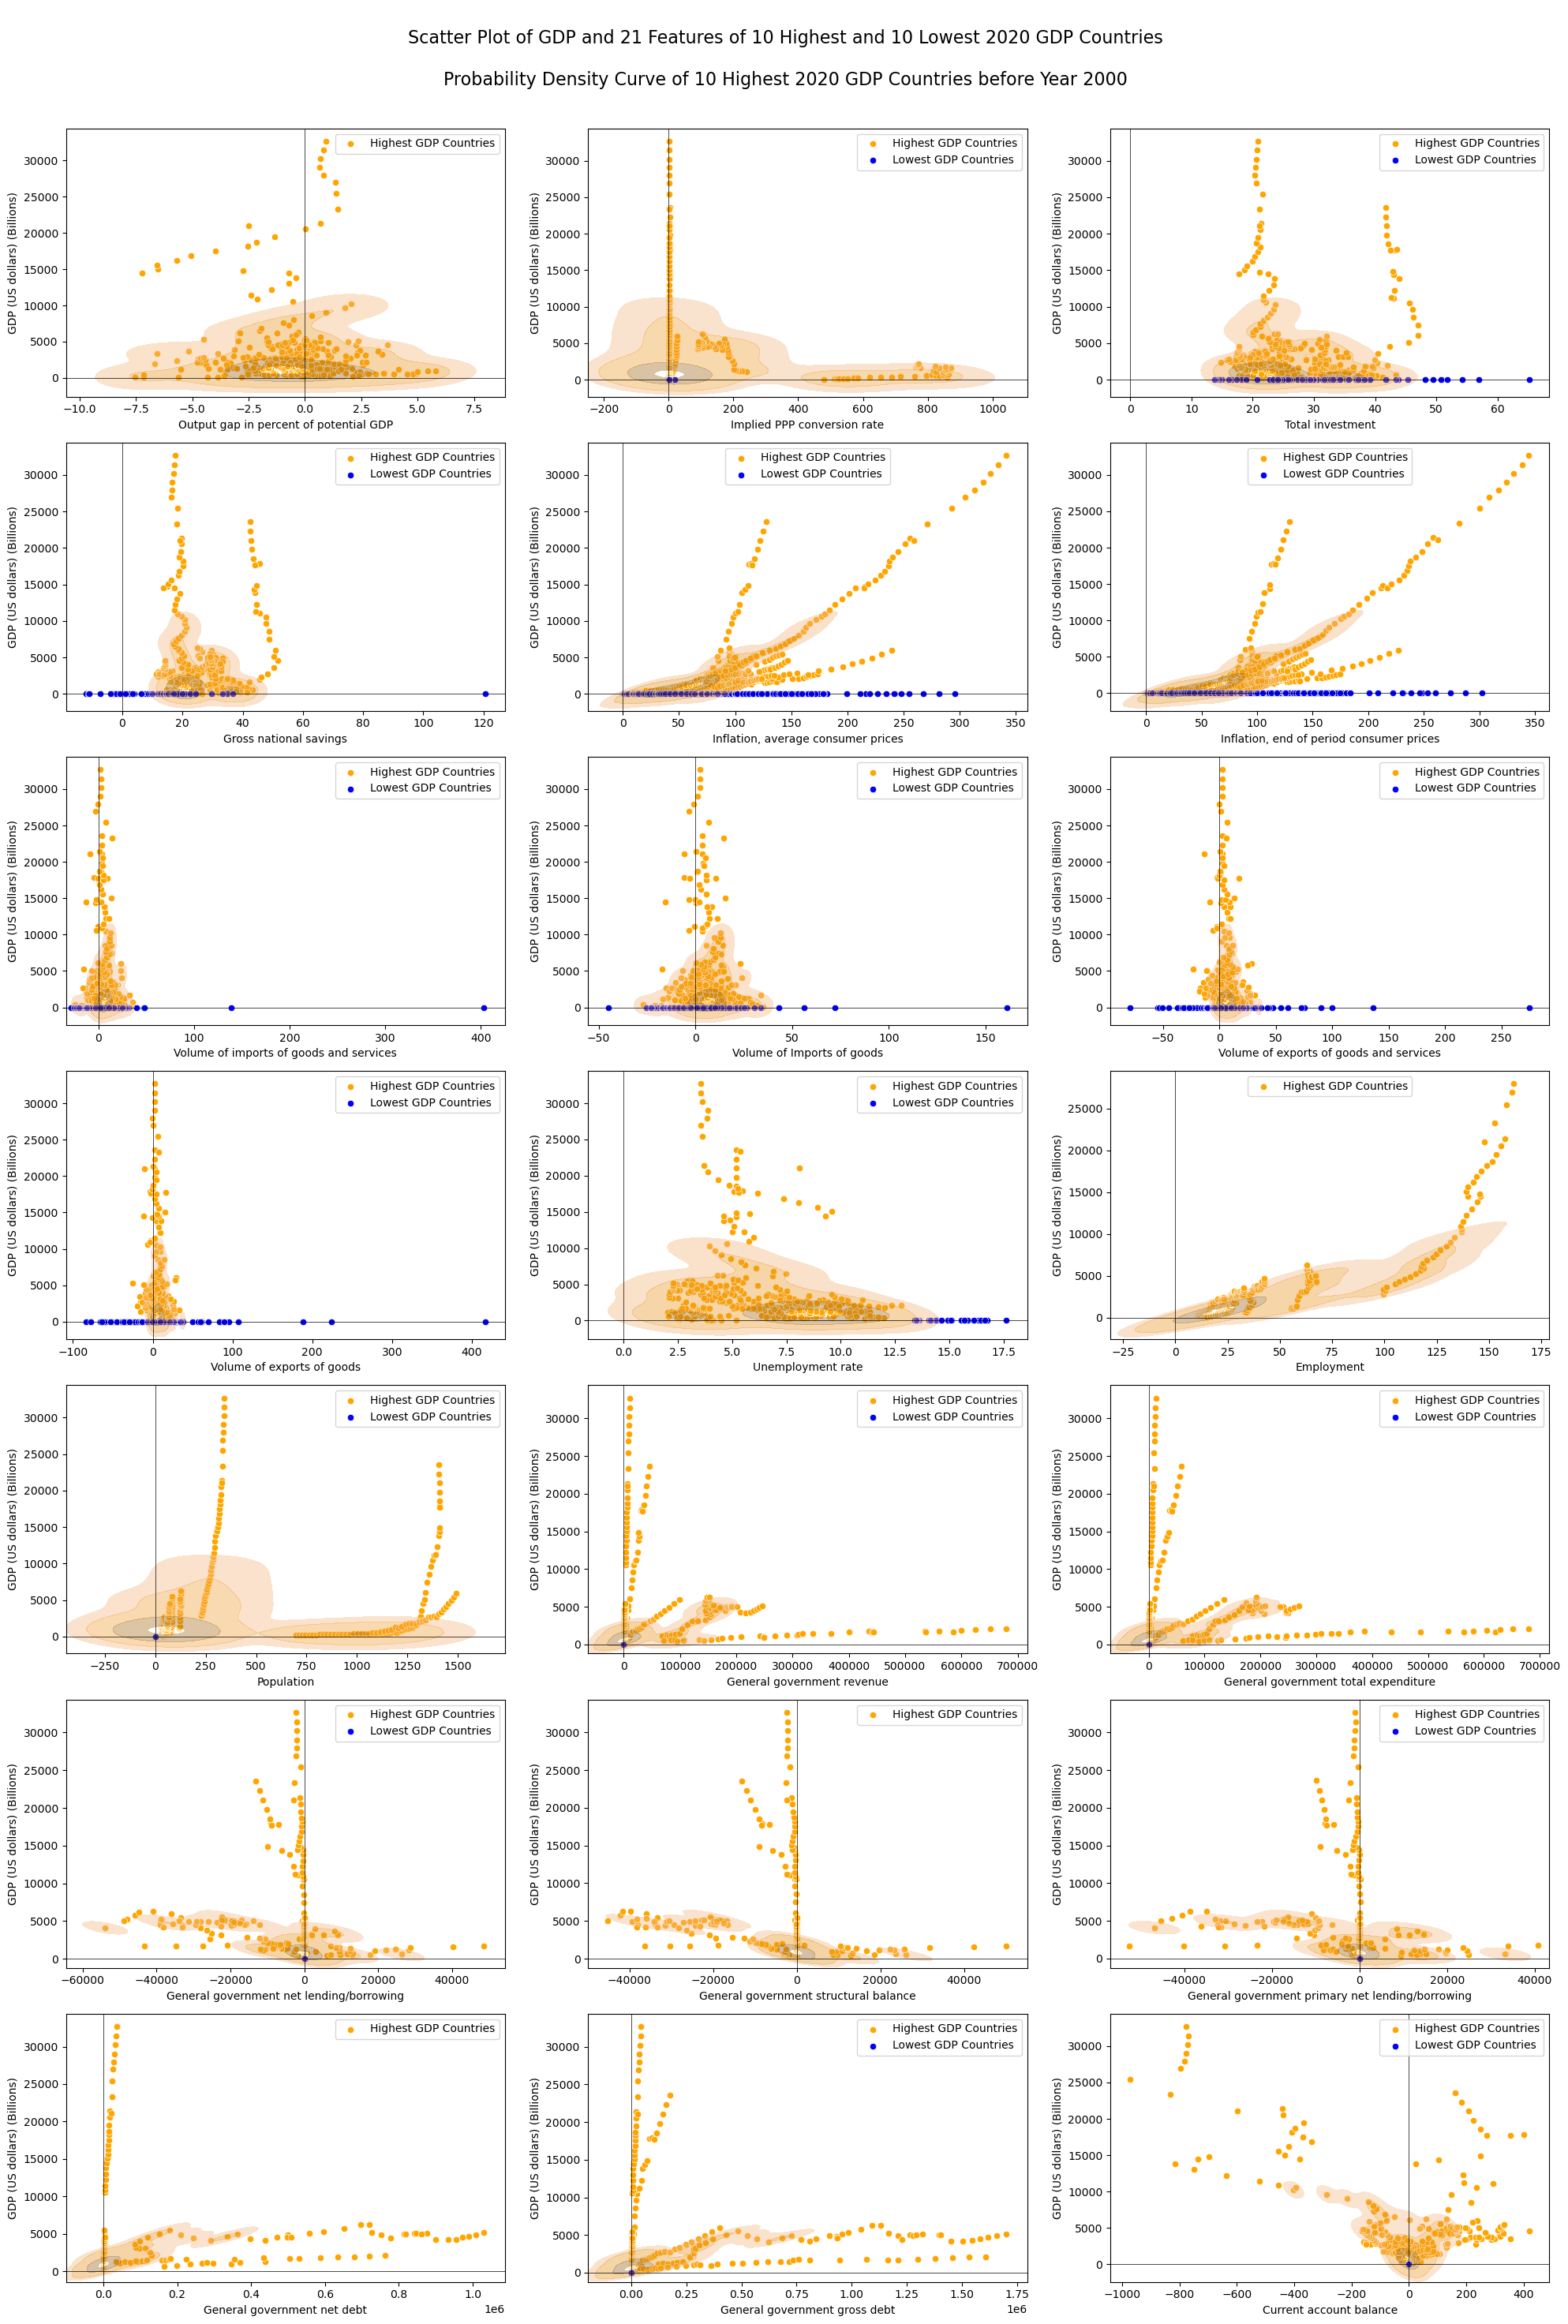

In [11]:
# Plot the one-sided triangle scatter plot with kde
fig, ax = plt.subplots(7, 3, figsize=(20, 30))
for i in range(7):
    for j in range(3):
        if i*3+j >= len(not_gdp_num_col_name):
            break
        sns.scatterplot(data=plot_data[plot_data['country'].apply(lambda x: x in high_gdp_2020_country_list)], x=not_gdp_num_col_name[i*3+j], y='Gross domestic product, current prices.1', ax=ax[i, j], label='Highest GDP Countries', color='orange')
        sns.scatterplot(data=plot_data[plot_data['country'].apply(lambda x: x in low_gdp_2020_country_list)], x=not_gdp_num_col_name[i*3+j], y='Gross domestic product, current prices.1', ax=ax[i, j], label='Lowest GDP Countries', color='blue')
        sns.kdeplot(data=plot_data[(plot_data['country'].apply(lambda x: x in high_gdp_2020_country_list)) & (plot_data['year'] <= 2000)], x=not_gdp_num_col_name[i*3+j], y='Gross domestic product, current prices.1', ax=ax[i, j], levels=[0.01, 0.1, 0.5, 0.9], fill=True, alpha=0.4, color='orange')
        ax[i, j].axhline(0, color='black', linewidth=0.5)
        ax[i, j].axvline(0, color='black', linewidth=0.5)
        # set y-axis label
        ax[i, j].set_ylabel('GDP (US dollars) (Billions)')
# Add title
fig.suptitle('\nScatter Plot of GDP and 21 Features of 10 Highest and 10 Lowest 2020 GDP Countries\n\nProbability Density Curve of 10 Highest 2020 GDP Countries before Year 2000\n\n\n', fontsize=16)
plt.tight_layout()

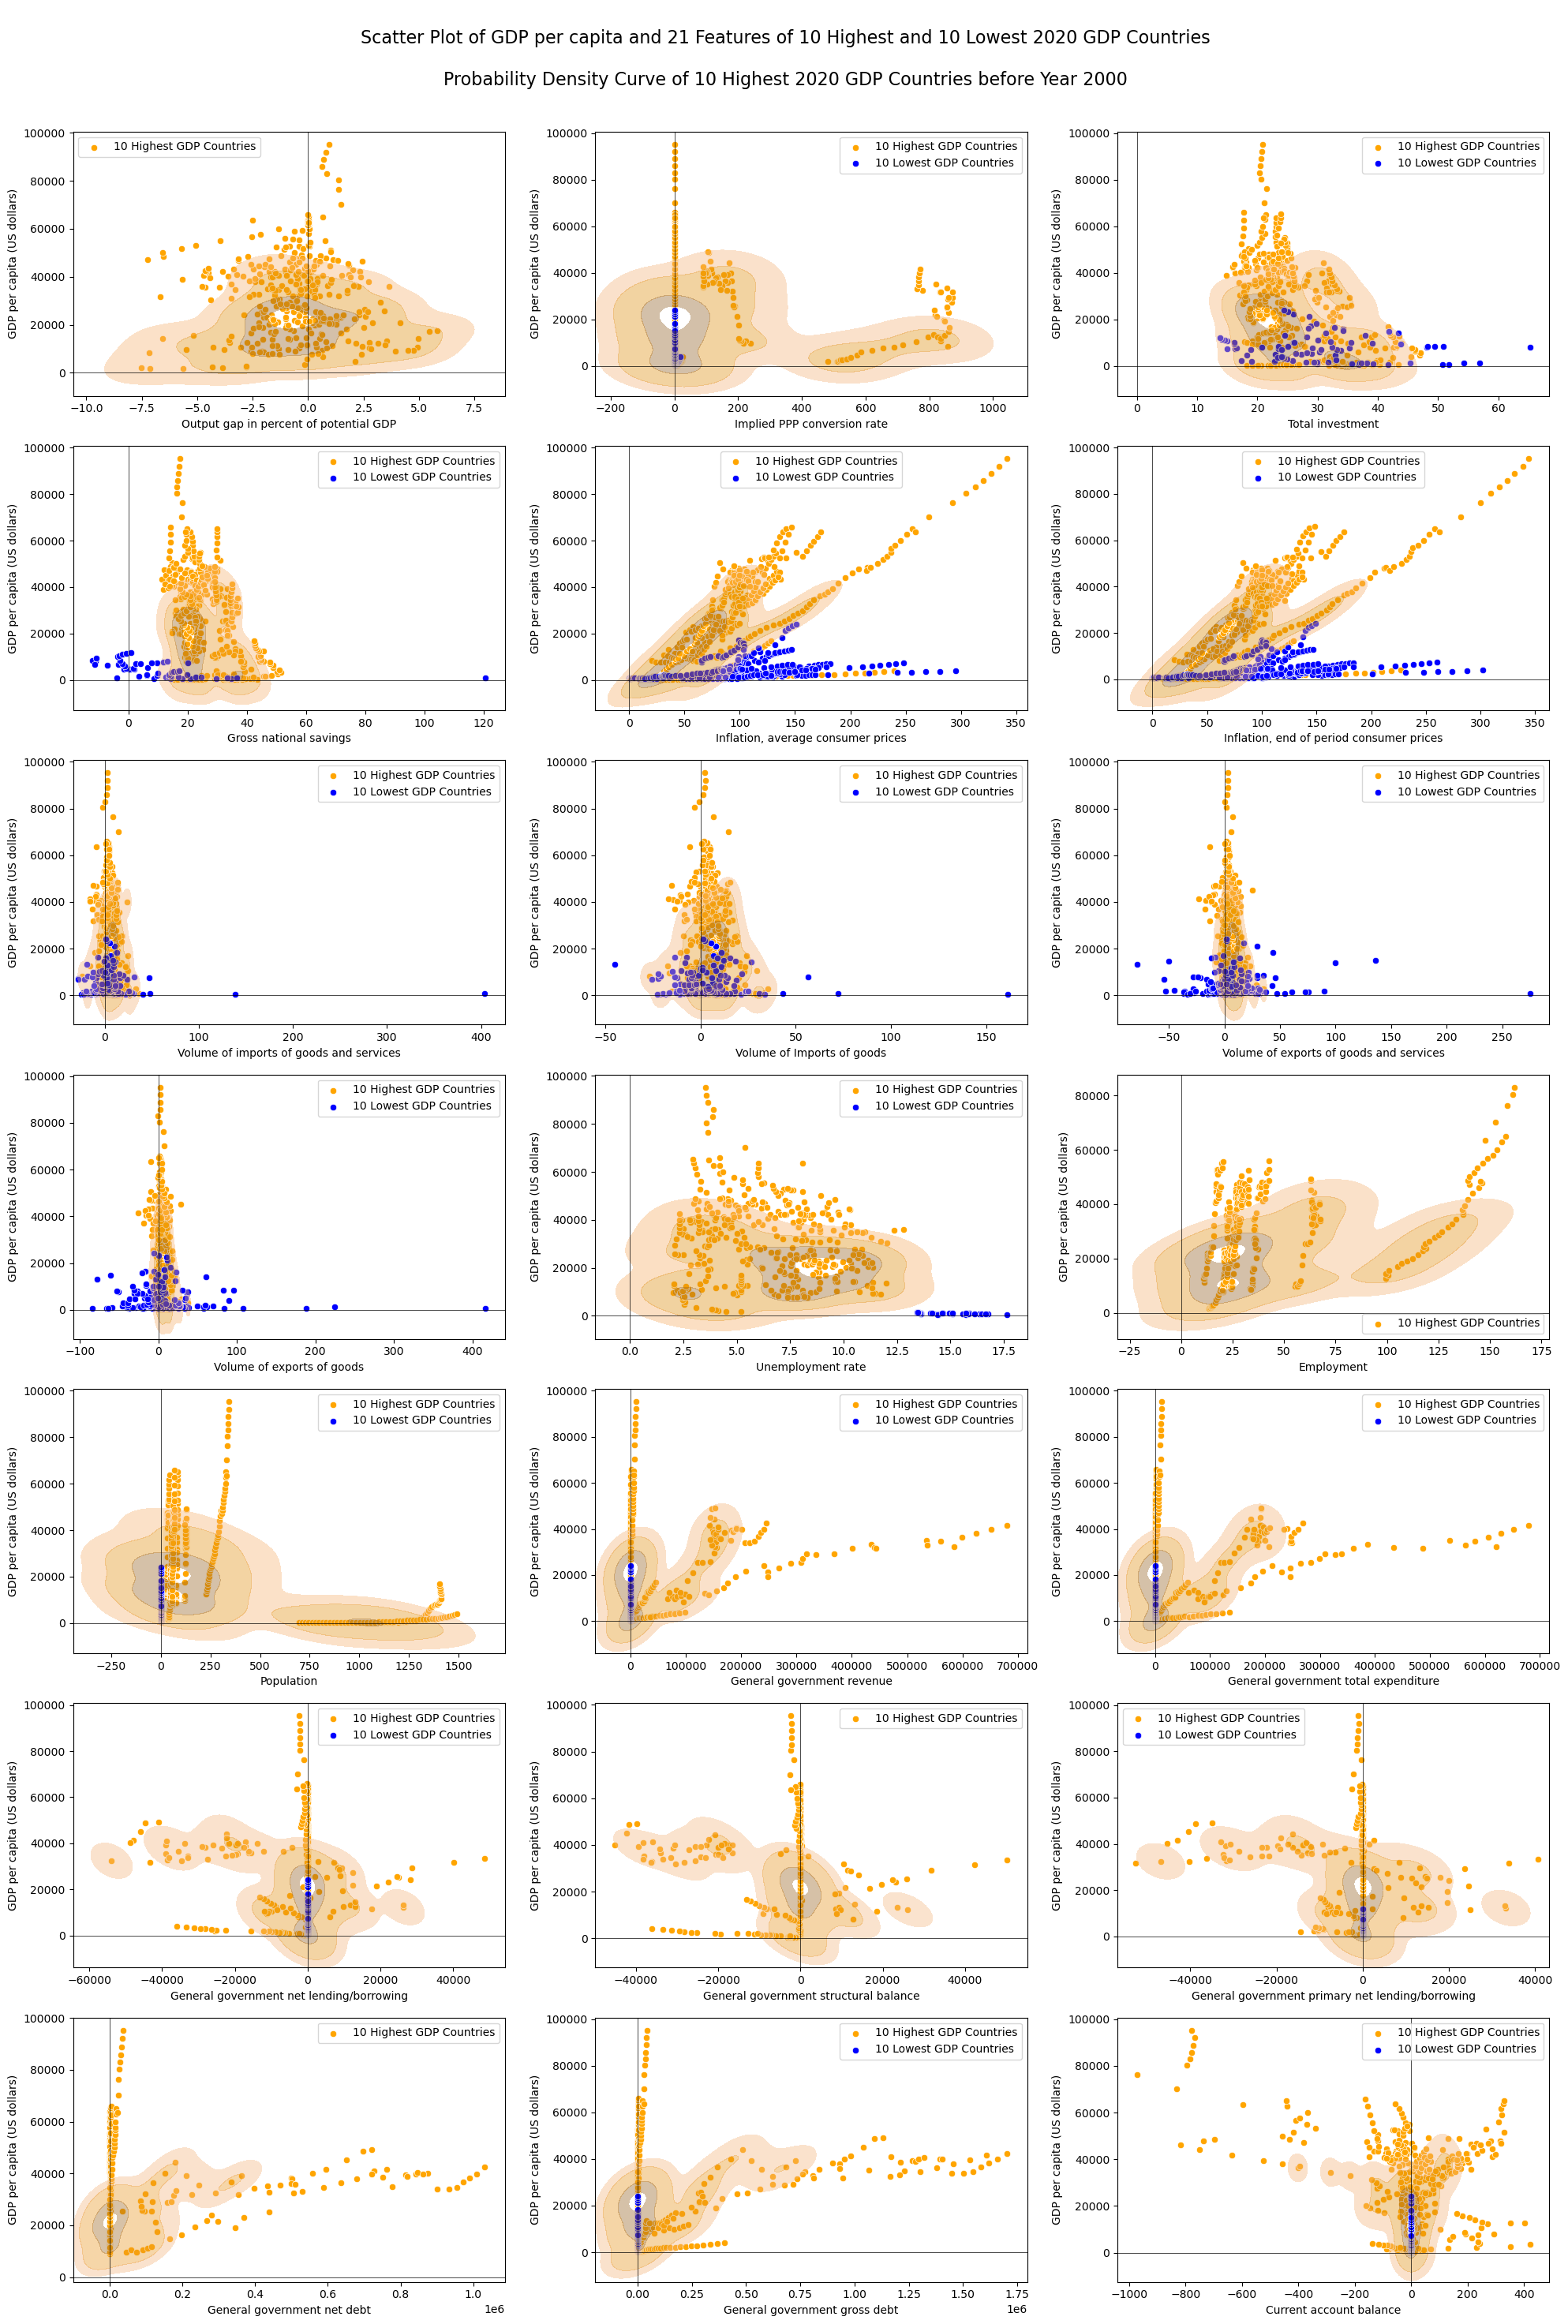

In [12]:
# Plot the one-sided triangle scatter plot with kde
fig, ax = plt.subplots(7, 3, figsize=(20, 30))
for i in range(7):
    for j in range(3):
        if i*3+j >= len(not_gdp_num_col_name):
            break
        sns.scatterplot(data=plot_data[plot_data['country'].apply(lambda x: x in high_gdp_2020_country_list)], x=not_gdp_num_col_name[i*3+j], y='Gross domestic product per capita, current prices.1', ax=ax[i, j], color='orange', label='10 Highest GDP Countries')
        sns.scatterplot(data=plot_data[plot_data['country'].apply(lambda x: x in low_gdp_2020_country_list)], x=not_gdp_num_col_name[i*3+j], y='Gross domestic product per capita, current prices.1', ax=ax[i, j], color='blue', label='10 Lowest GDP Countries')
        sns.kdeplot(data=plot_data[(plot_data['country'].apply(lambda x: x in high_gdp_2020_country_list)) & (plot_data['year'] <= 2000)], x=not_gdp_num_col_name[i*3+j], y='Gross domestic product per capita, current prices.1', ax=ax[i, j], levels=[0.01, 0.1, 0.5, 0.9], fill=True, alpha=0.4, color='orange')
        ax[i, j].axhline(0, color='black', linewidth=0.5)
        ax[i, j].axvline(0, color='black', linewidth=0.5)
        # set y-axis label
        ax[i, j].set_ylabel('GDP per capita (US dollars)')

# Add title
fig.suptitle('\nScatter Plot of GDP per capita and 21 Features of 10 Highest and 10 Lowest 2020 GDP Countries\n\nProbability Density Curve of 10 Highest 2020 GDP Countries before Year 2000\n\n\n', fontsize=16)
plt.tight_layout()

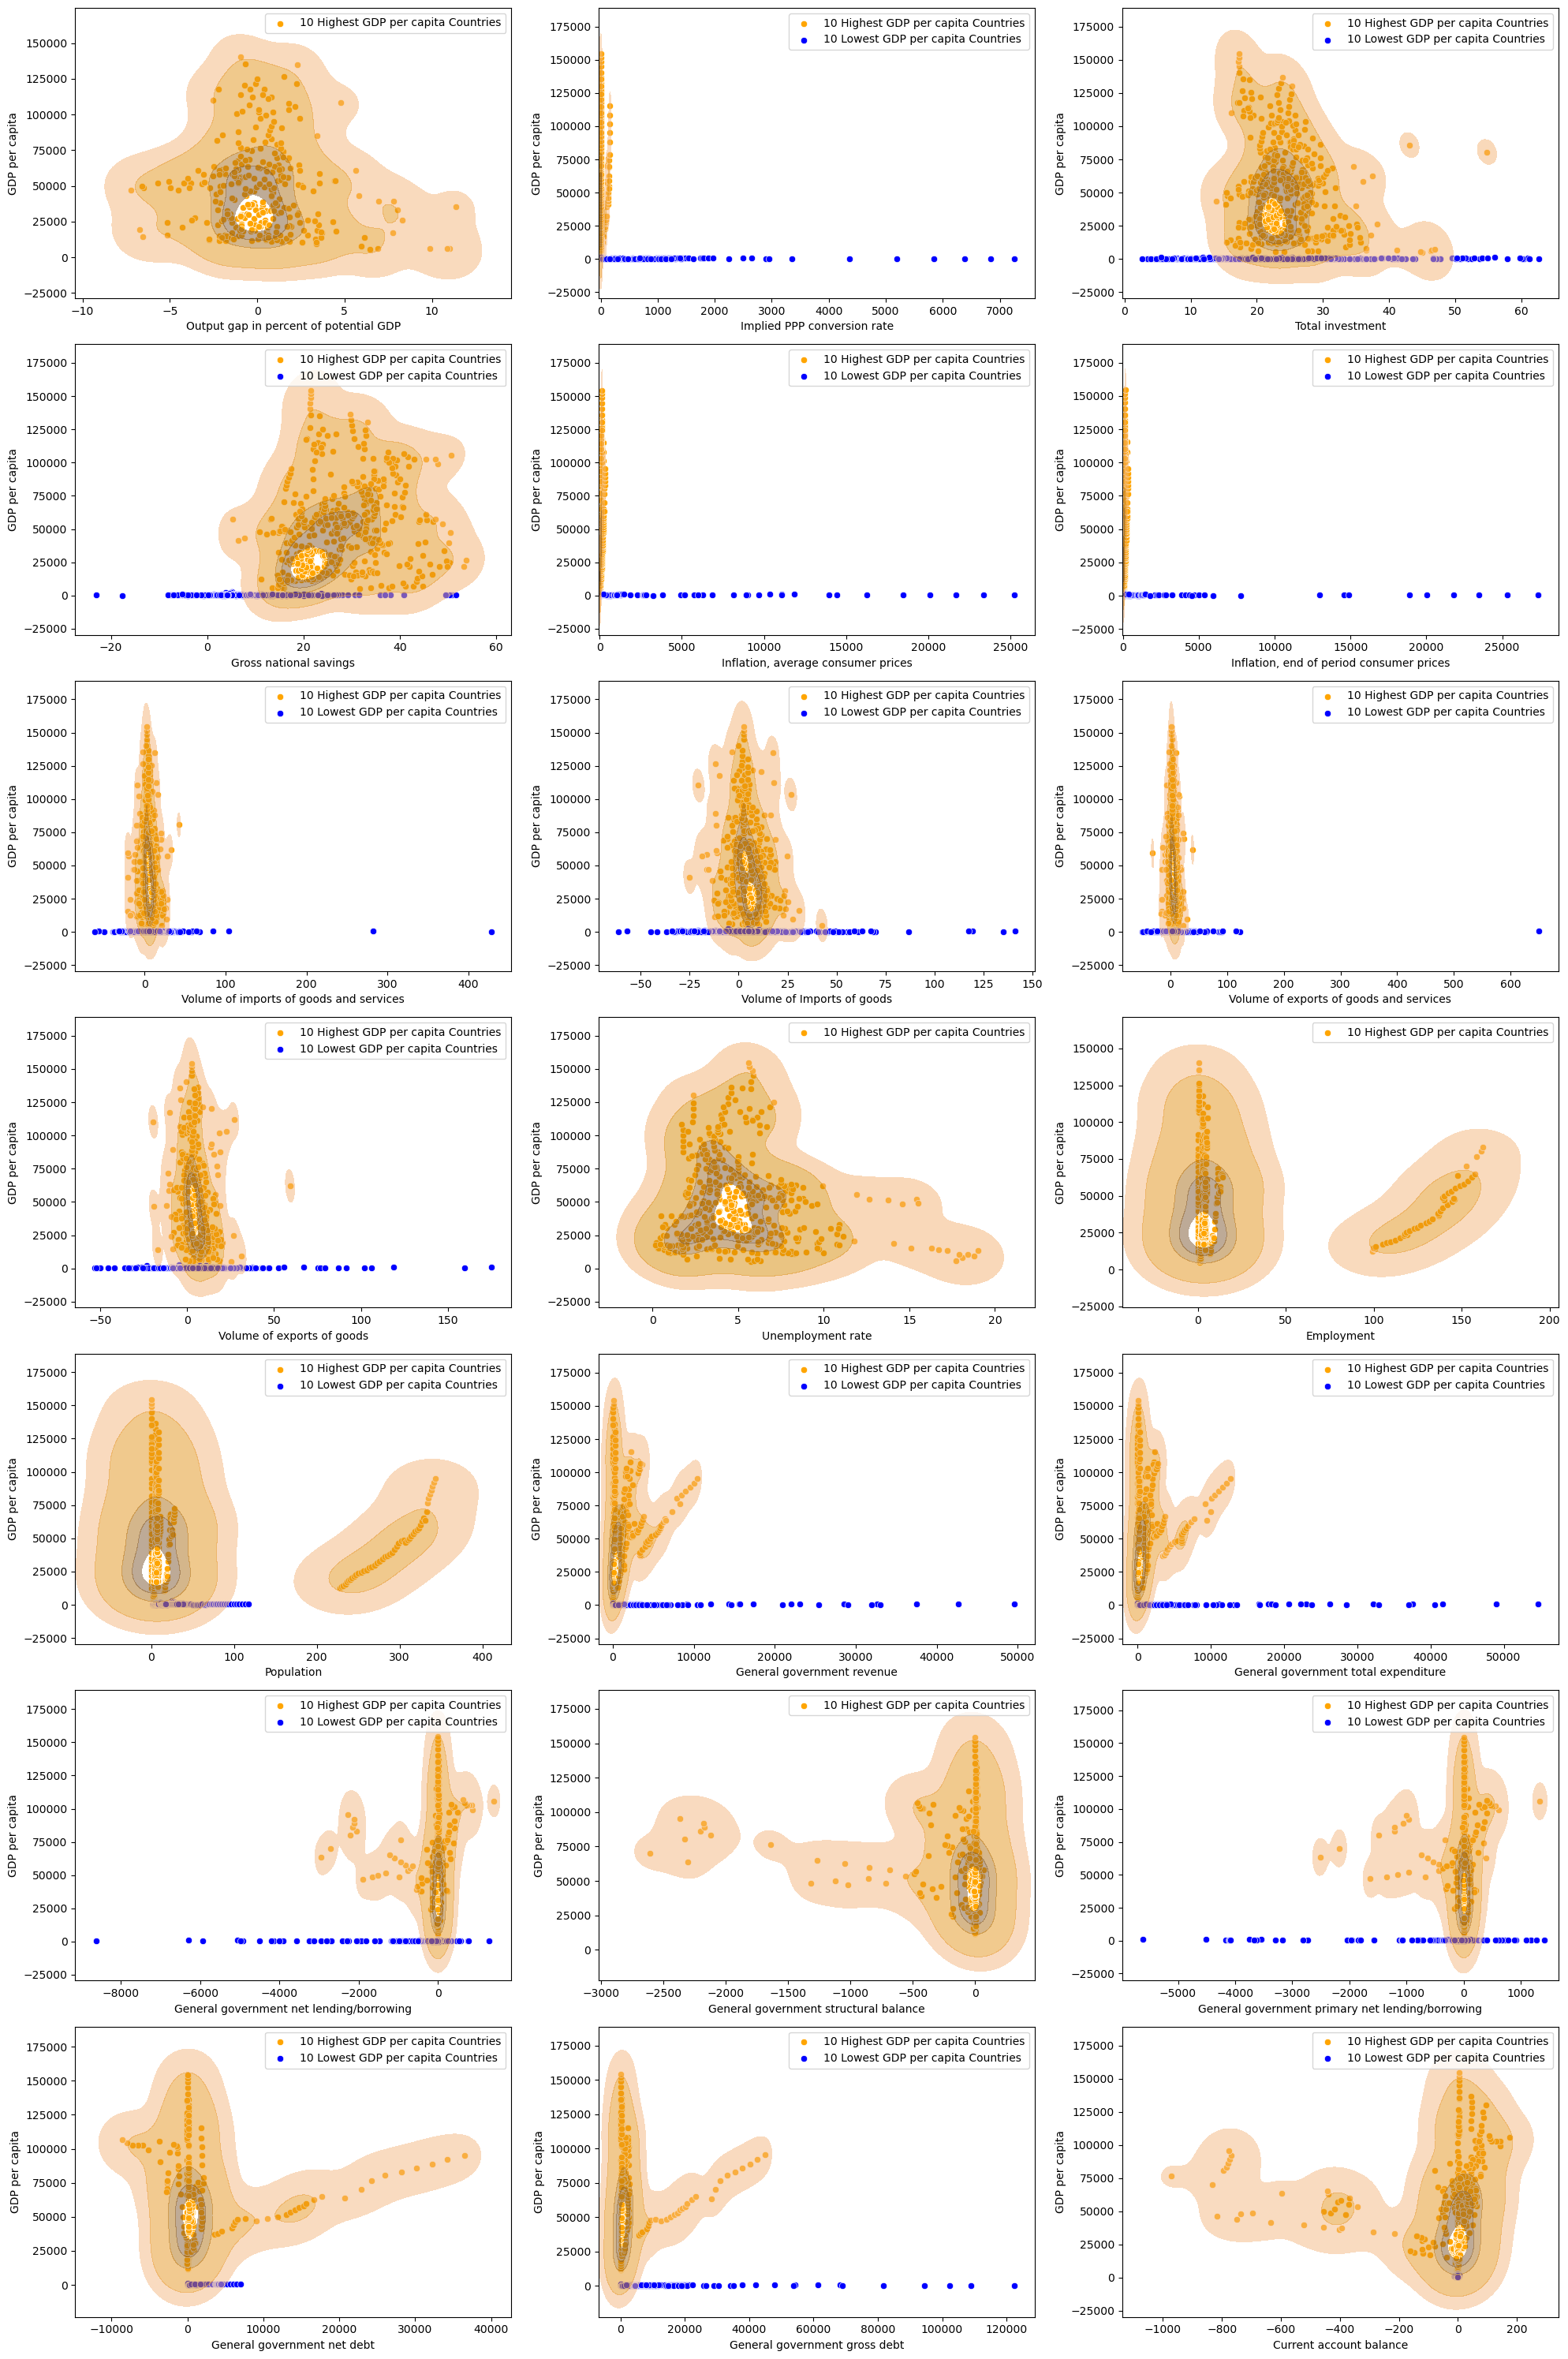

In [13]:
# Plot the one-sided triangle scatter plot with kde
fig, ax = plt.subplots(7, 3, figsize=(20, 30))
for i in range(7):
    for j in range(3):
        if i*3+j >= len(not_gdp_num_col_name):
            break
        sns.scatterplot(data=plot_data[plot_data['country'].apply(lambda x: x in high_gdppc_2020_country_list)], x=not_gdp_num_col_name[i*3+j], y='Gross domestic product per capita, current prices.1', ax=ax[i, j], color='orange', label='10 Highest GDP per capita Countries')
        sns.scatterplot(data=plot_data[plot_data['country'].apply(lambda x: x in low_gdppc_2020_country_list)], x=not_gdp_num_col_name[i*3+j], y='Gross domestic product per capita, current prices.1', ax=ax[i, j], color='blue', label='10 Lowest GDP per capita Countries')
        sns.kdeplot(data=plot_data[plot_data['country'].apply(lambda x: x in high_gdppc_2020_country_list)], x=not_gdp_num_col_name[i*3+j], y='Gross domestic product per capita, current prices.1', ax=ax[i, j], levels=[0.01, 0.1, 0.5, 0.7, 0.9], fill=True, alpha=0.5, color='orange')
        # set y-axis label
        ax[i, j].set_ylabel('GDP per capita')
plt.tight_layout()

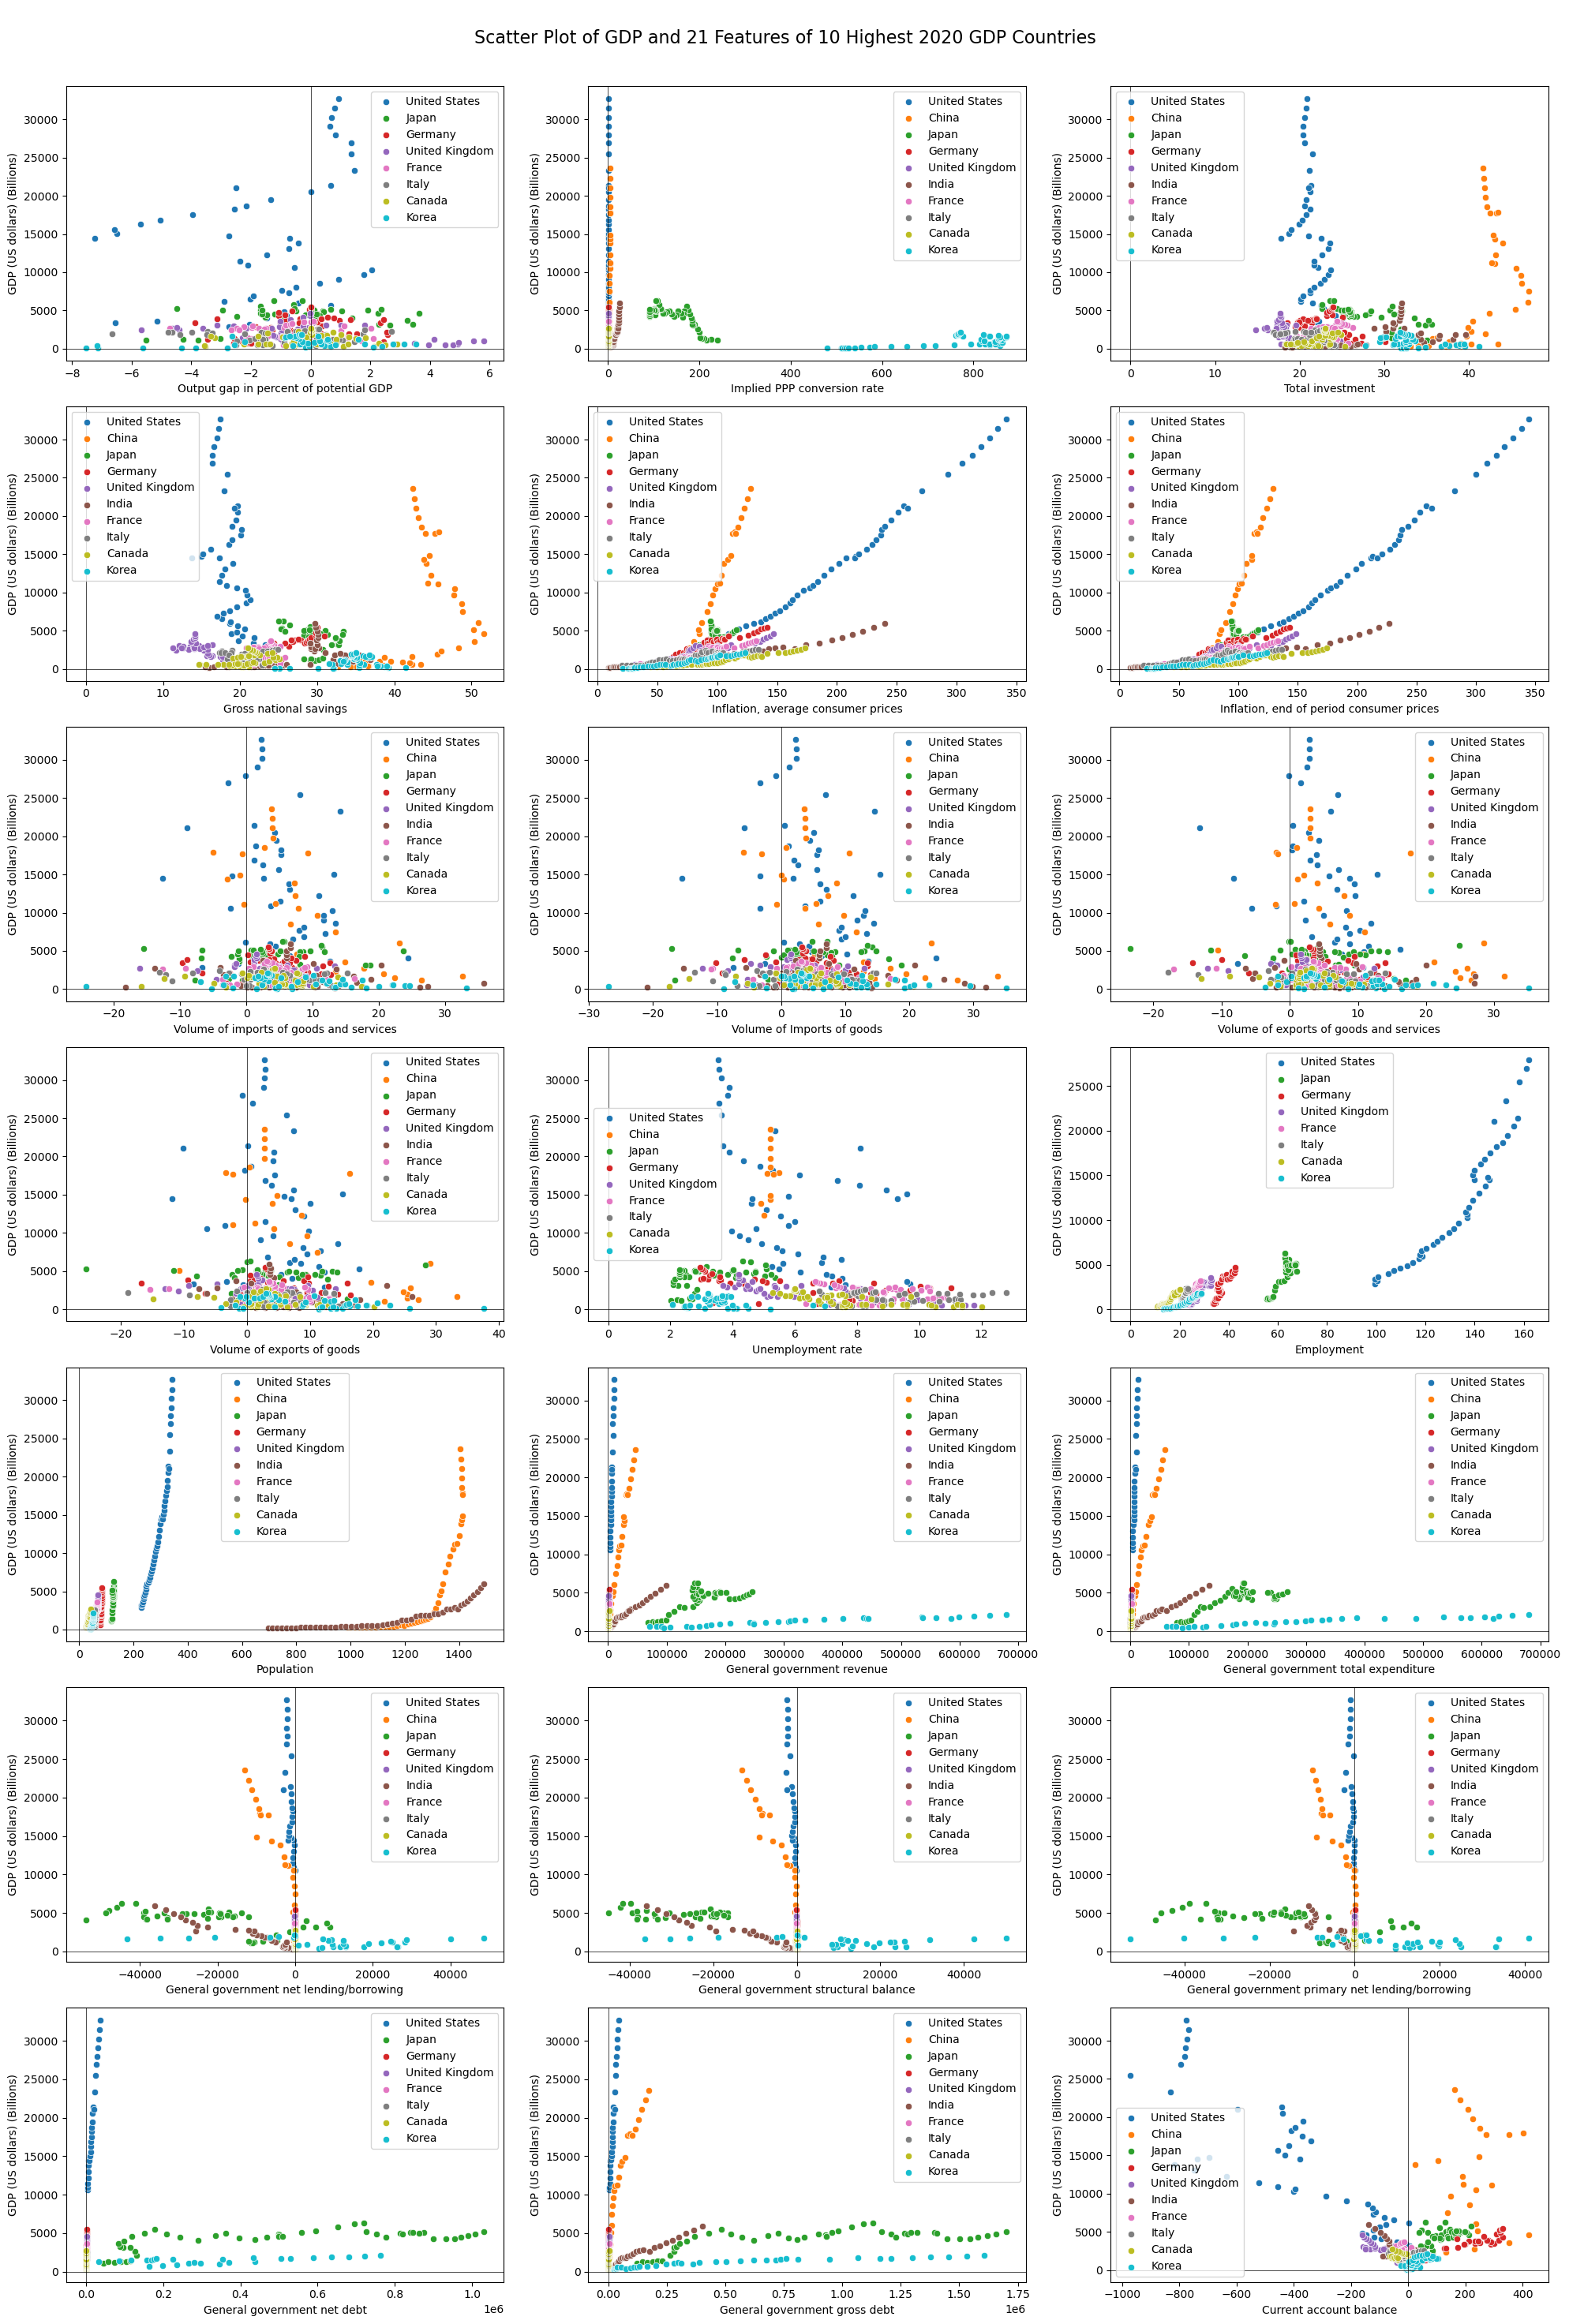

In [14]:
# Plot the one-sided triangle scatter plot with kde
fig, ax = plt.subplots(7, 3, figsize=(20, 30))
for i in range(7):
    for j in range(3):
        if i*3+j >= len(not_gdp_num_col_name):
            break
        for country in high_gdp_2020_country_list:
            sns.scatterplot(data=plot_data[plot_data['country'] == country], x=not_gdp_num_col_name[i*3+j], y='Gross domestic product, current prices.1', ax=ax[i, j], label=country)
            # sns.kdeplot(data=plot_data[plot_data['country'] == country], x=not_gdp_num_col_name[i*3+j], y='Gross domestic product, current prices.1', ax=ax[i, j], levels=[0.01, 0.1, 0.5, 0.7, 0.9], fill=True, alpha=0.3)
        ax[i, j].axhline(0, color='black', linewidth=0.5)
        ax[i, j].axvline(0, color='black', linewidth=0.5)
        # set y-axis label
        ax[i, j].set_ylabel('GDP (US dollars) (Billions)')
fig.suptitle('\nScatter Plot of GDP and 21 Features of 10 Highest 2020 GDP Countries\n\n\n', fontsize=16)
plt.tight_layout()

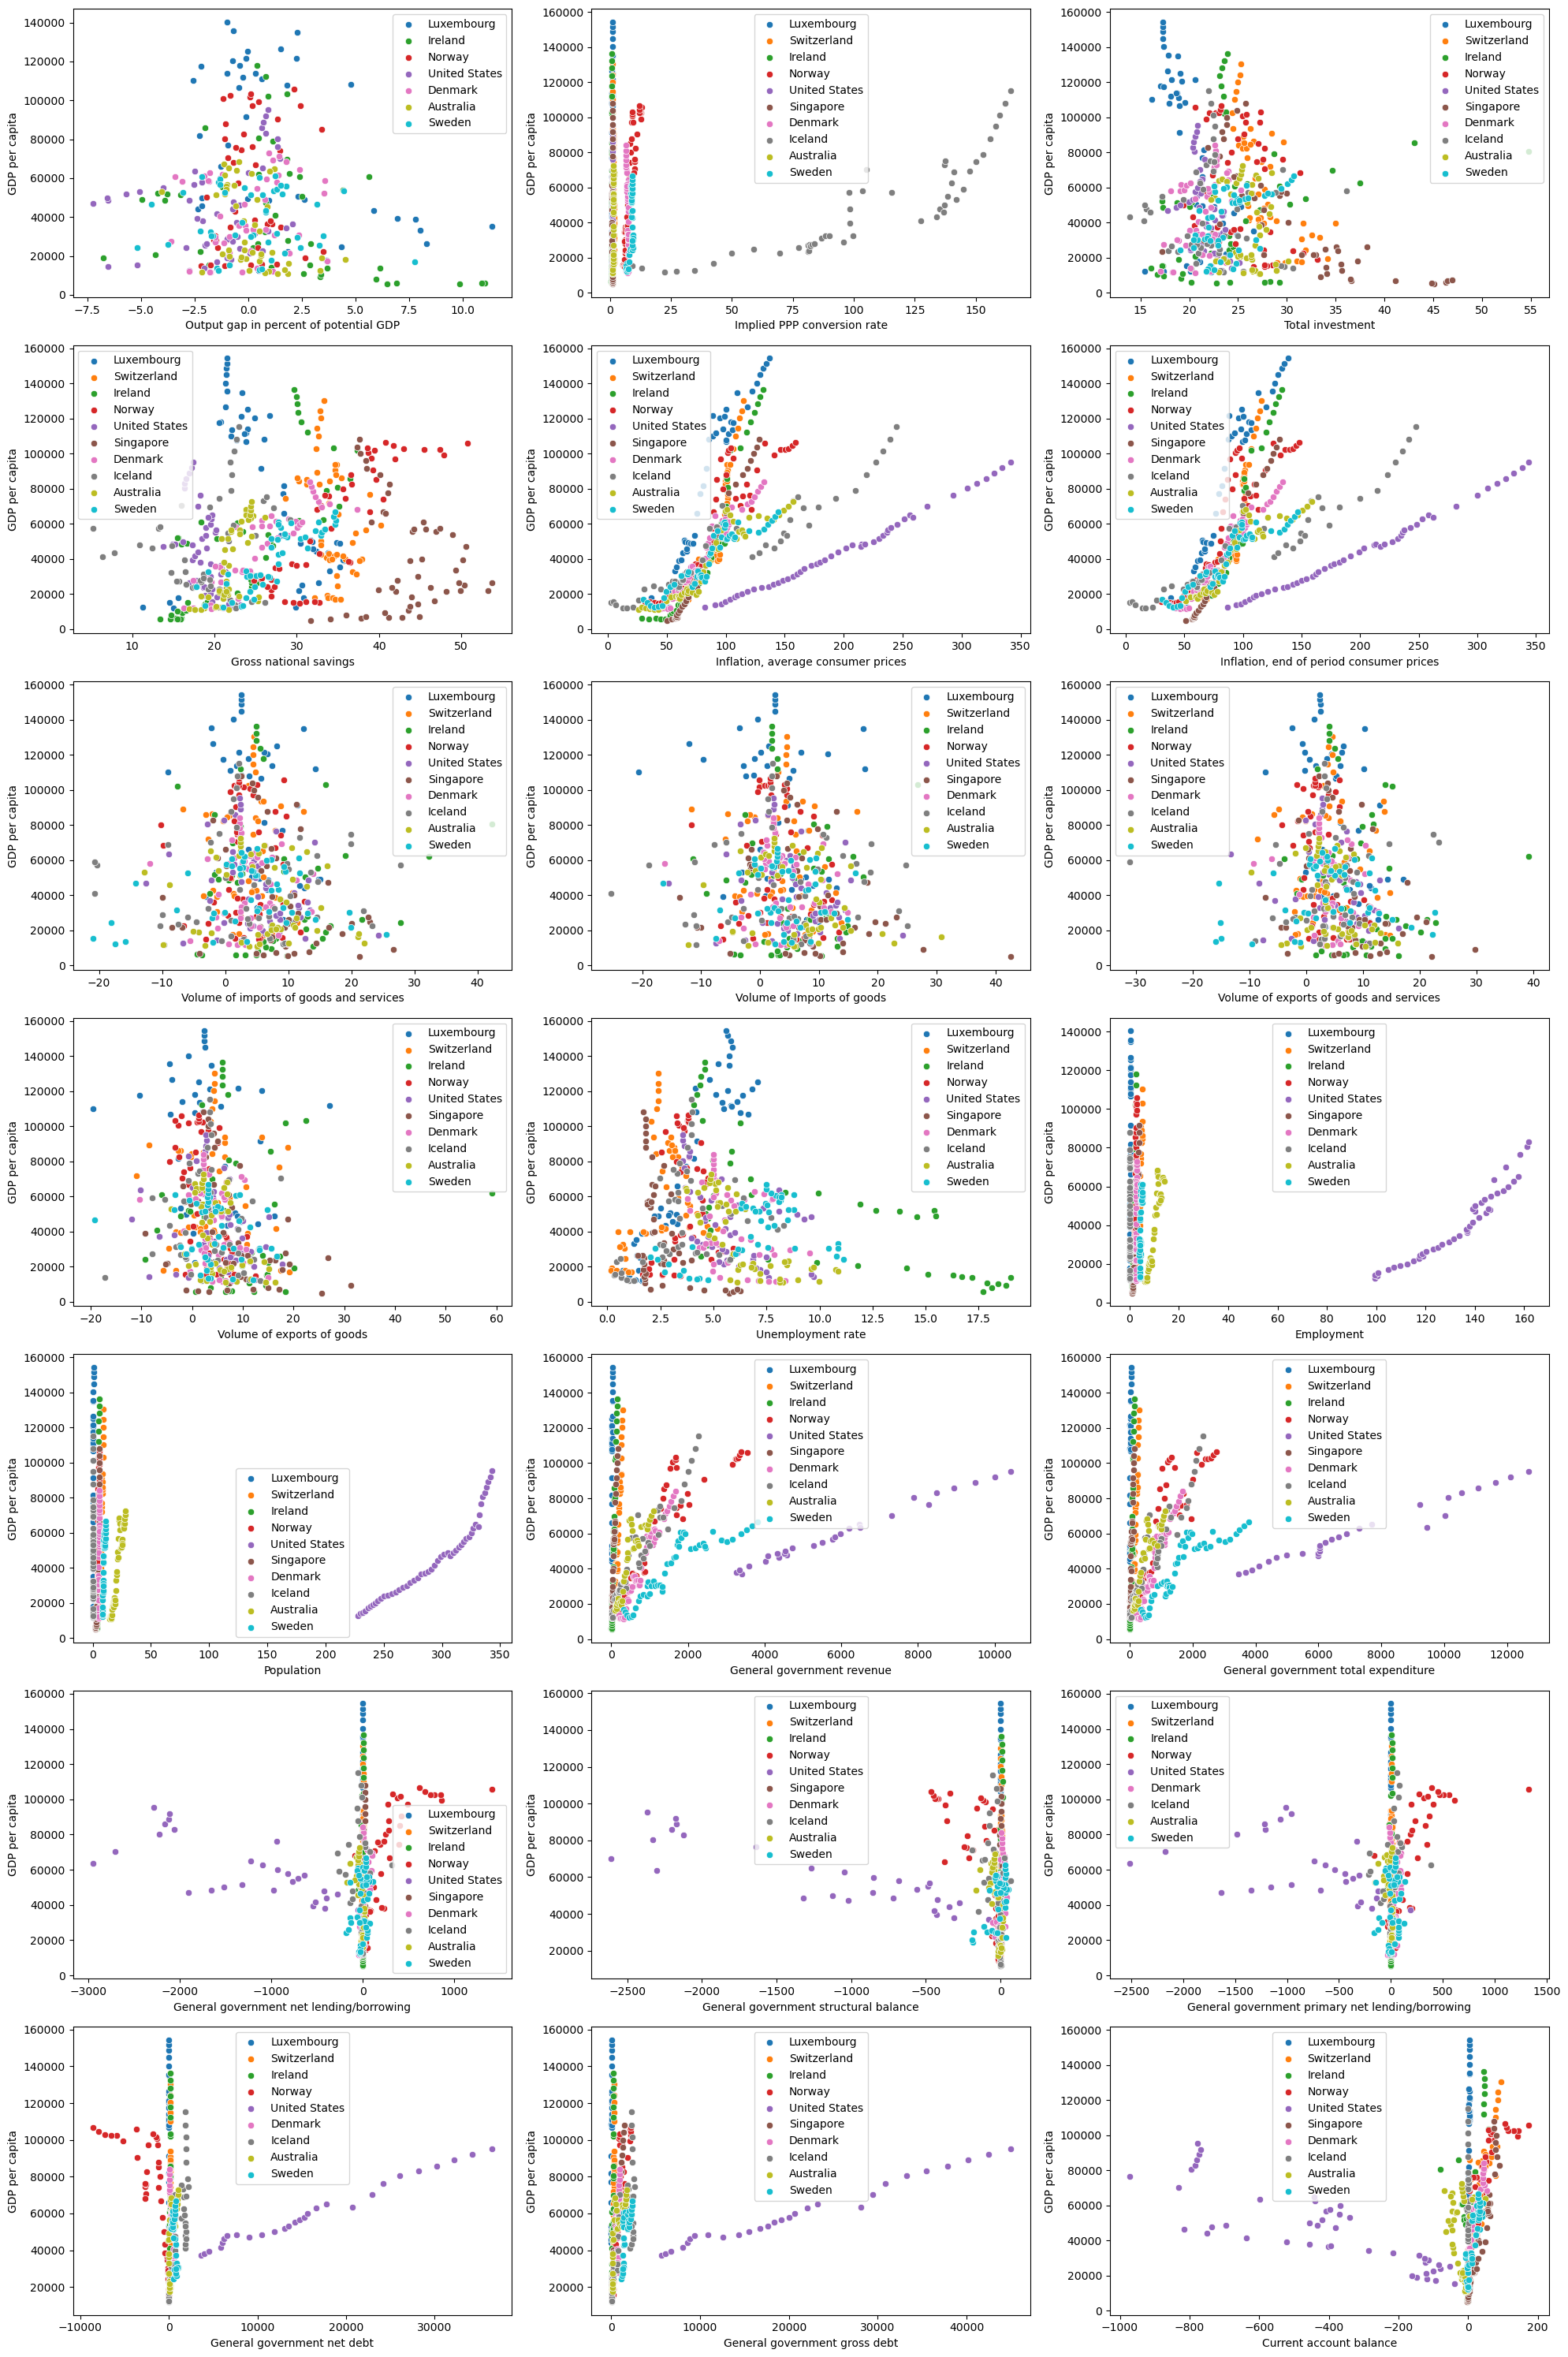

In [15]:
# Plot the one-sided triangle scatter plot with kde
fig, ax = plt.subplots(7, 3, figsize=(20, 30))
for i in range(7):
    for j in range(3):
        if i*3+j >= len(not_gdp_num_col_name):
            break
        for country in high_gdppc_2020_country_list:
            sns.scatterplot(data=plot_data[plot_data['country'] == country], x=not_gdp_num_col_name[i*3+j], y='Gross domestic product per capita, current prices.1', ax=ax[i, j], label=country)
        # set y-axis label
        ax[i, j].set_ylabel('GDP per capita')
plt.tight_layout()

In [16]:
col_set_arr = [
    ['Output gap in percent of potential GDP', 'Current account balance', 'Unemployment rate', 'Total investment', 'Gross national savings', 'Implied PPP conversion rate'],
    ['Employment', 'Population', 'Inflation, average consumer prices', 'Inflation, end of period consumer prices'],
    ['General government revenue', 'General government total expenditure', 'General government primary net lending/borrowing', 'General government net lending/borrowing', 'General government structural balance', 'General government net debt', 'General government gross debt'],
    ['Volume of imports of goods and services', 'Volume of exports of goods', 'Volume of Imports of goods', 'Volume of exports of goods and services']
]
col_set_arr[0][1]

'Current account balance'

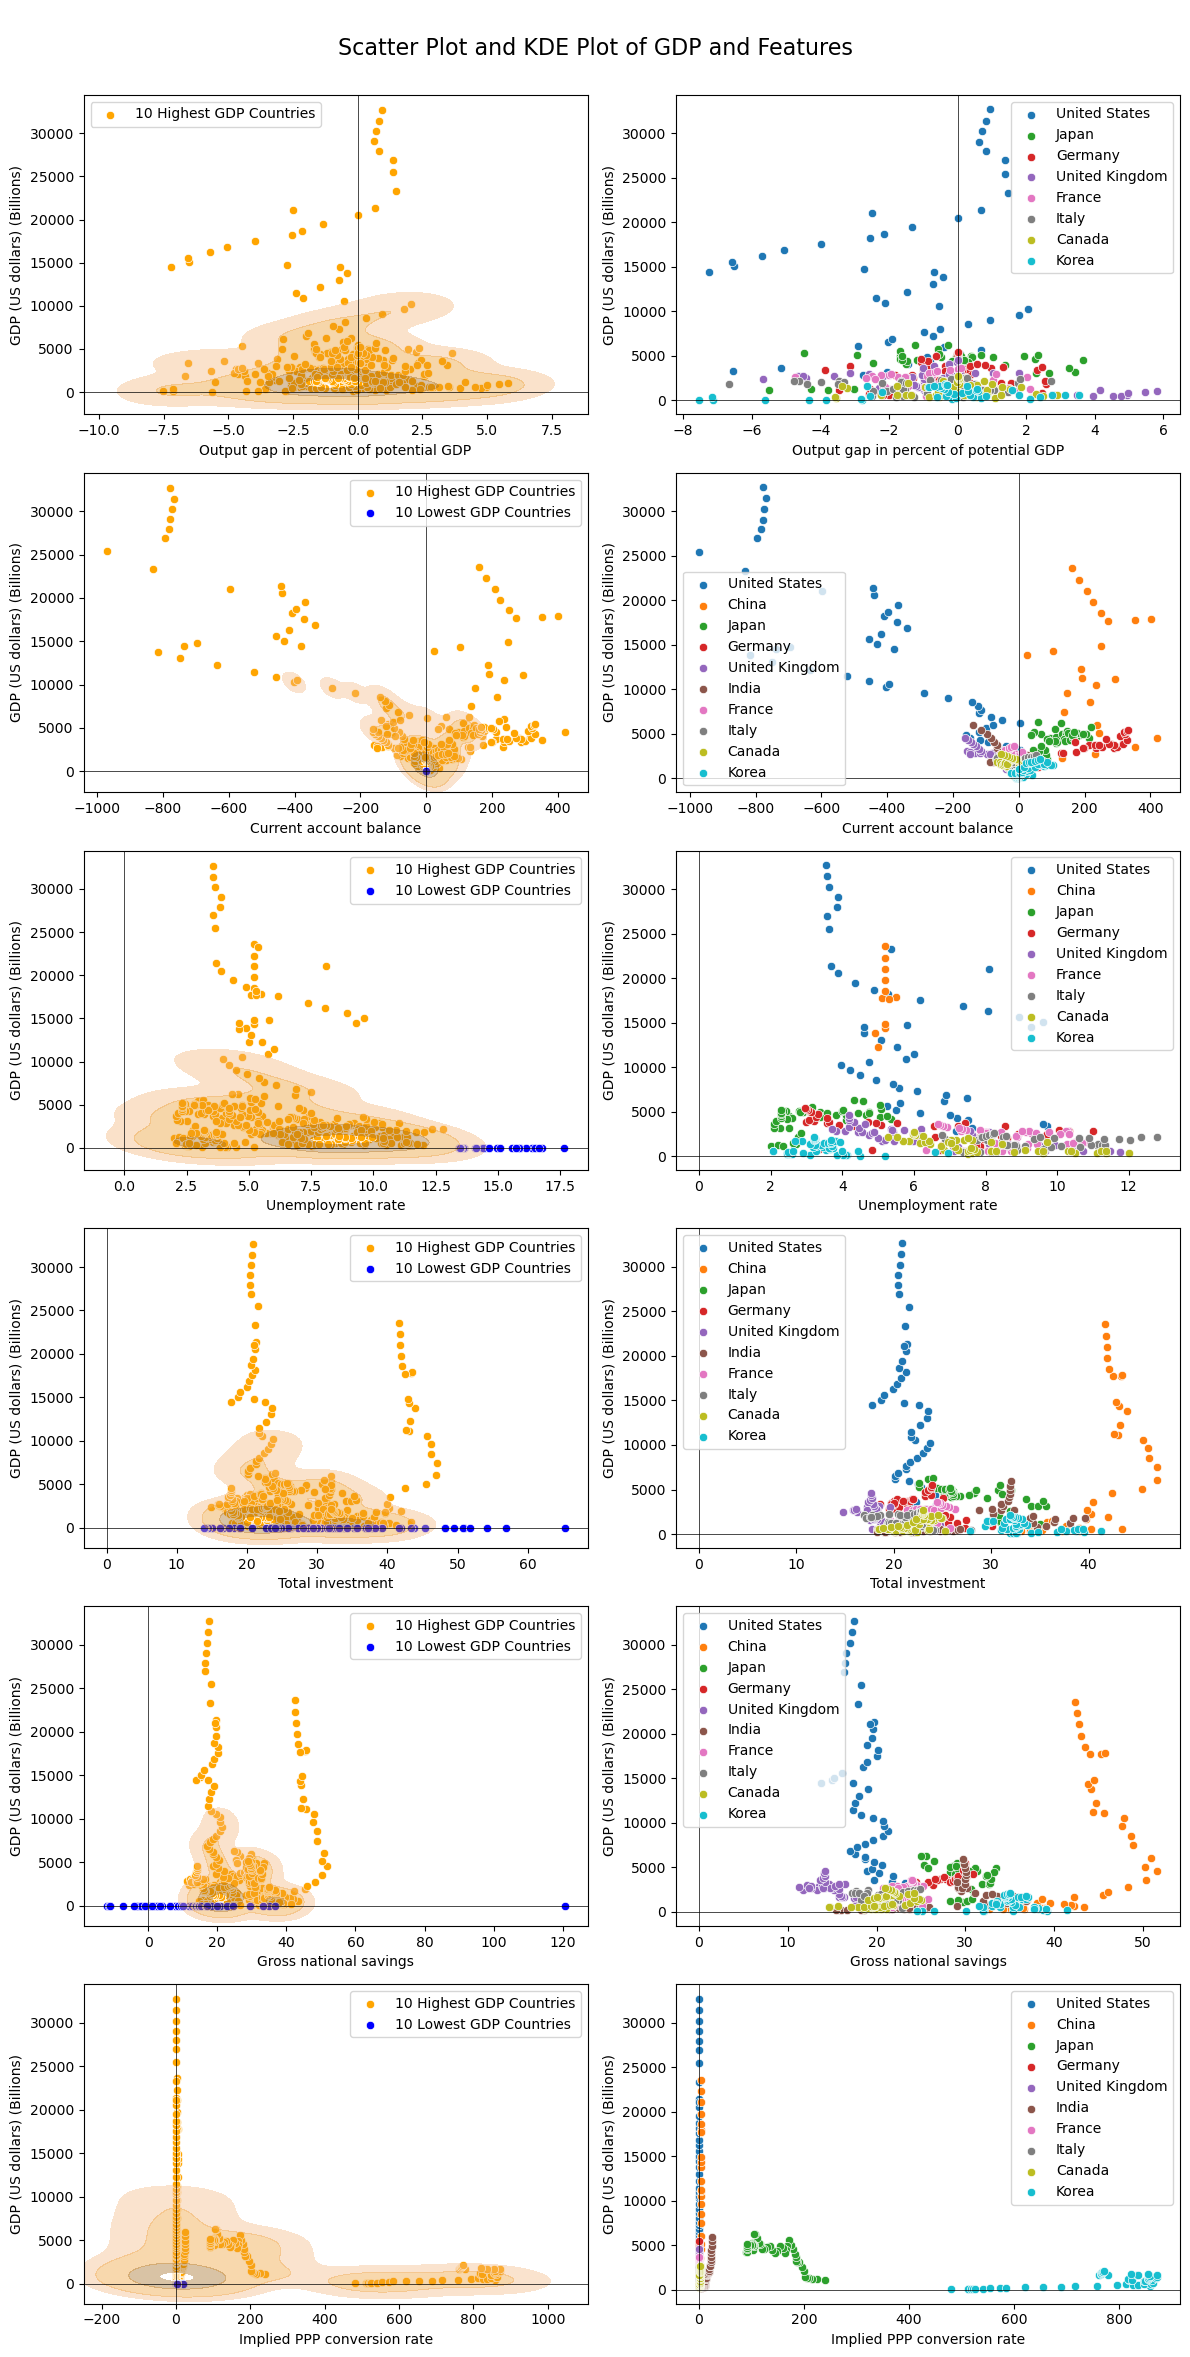

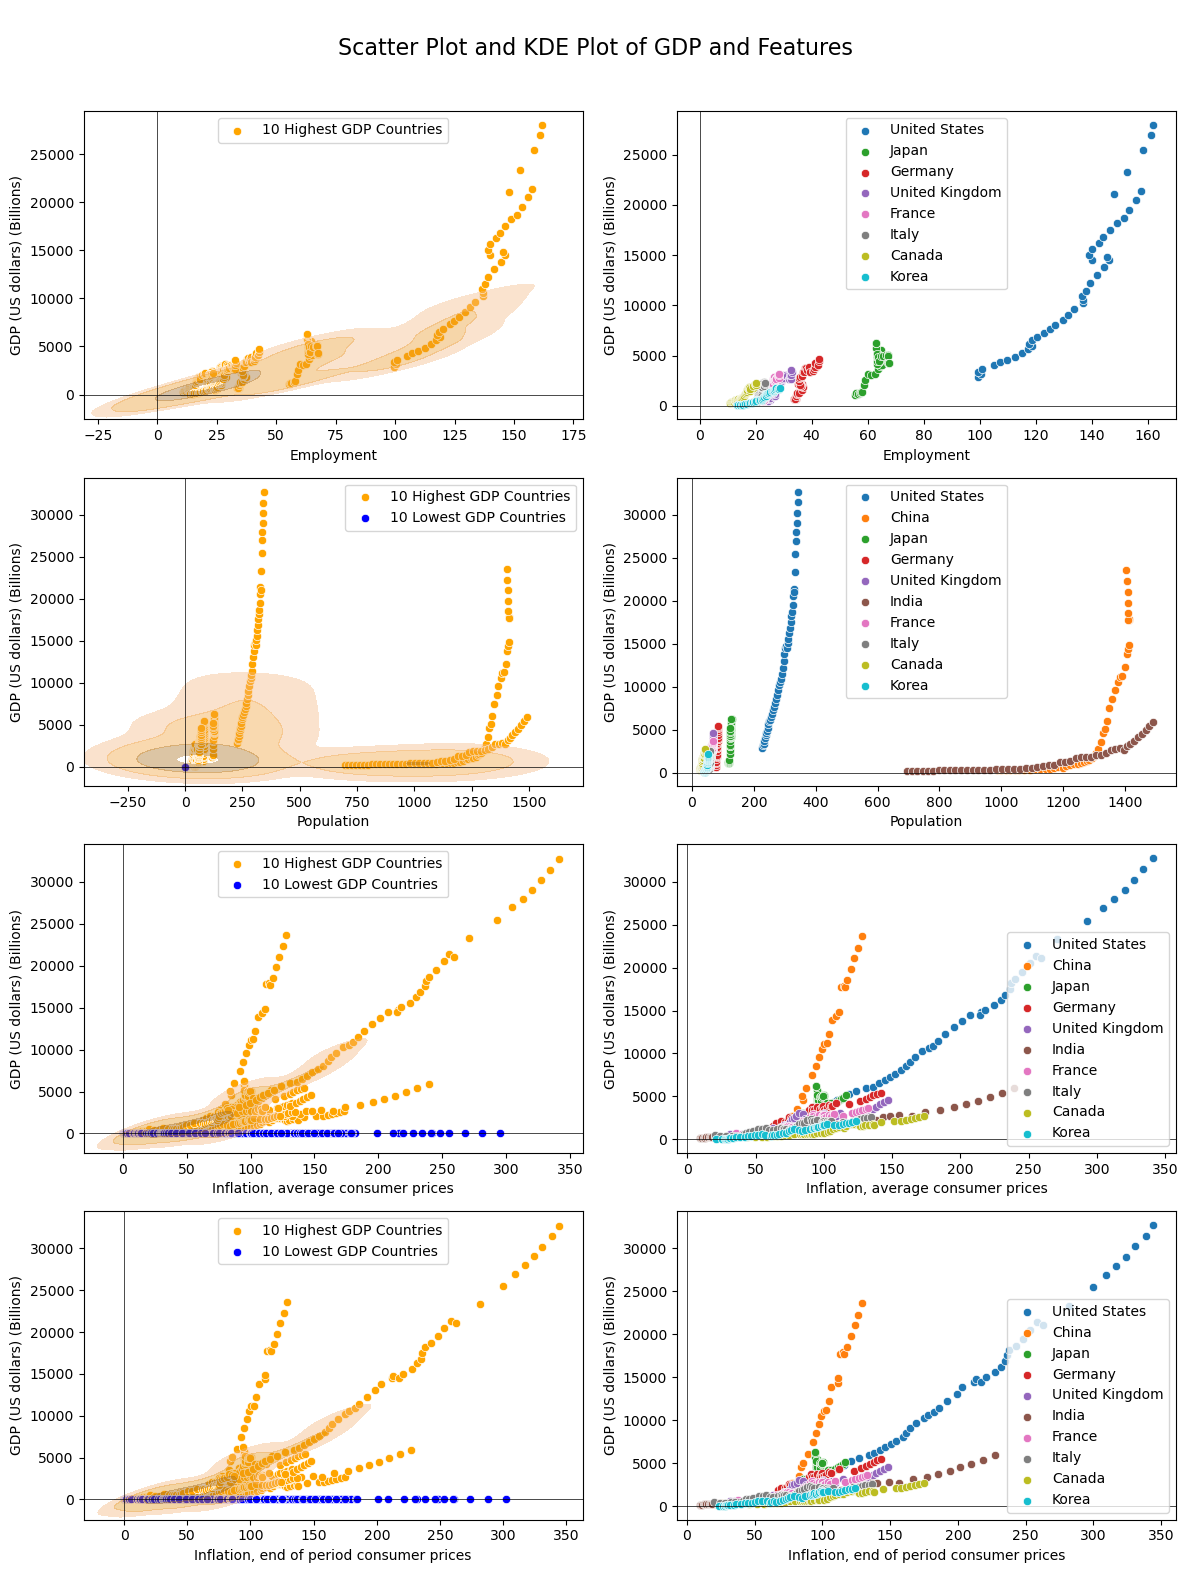

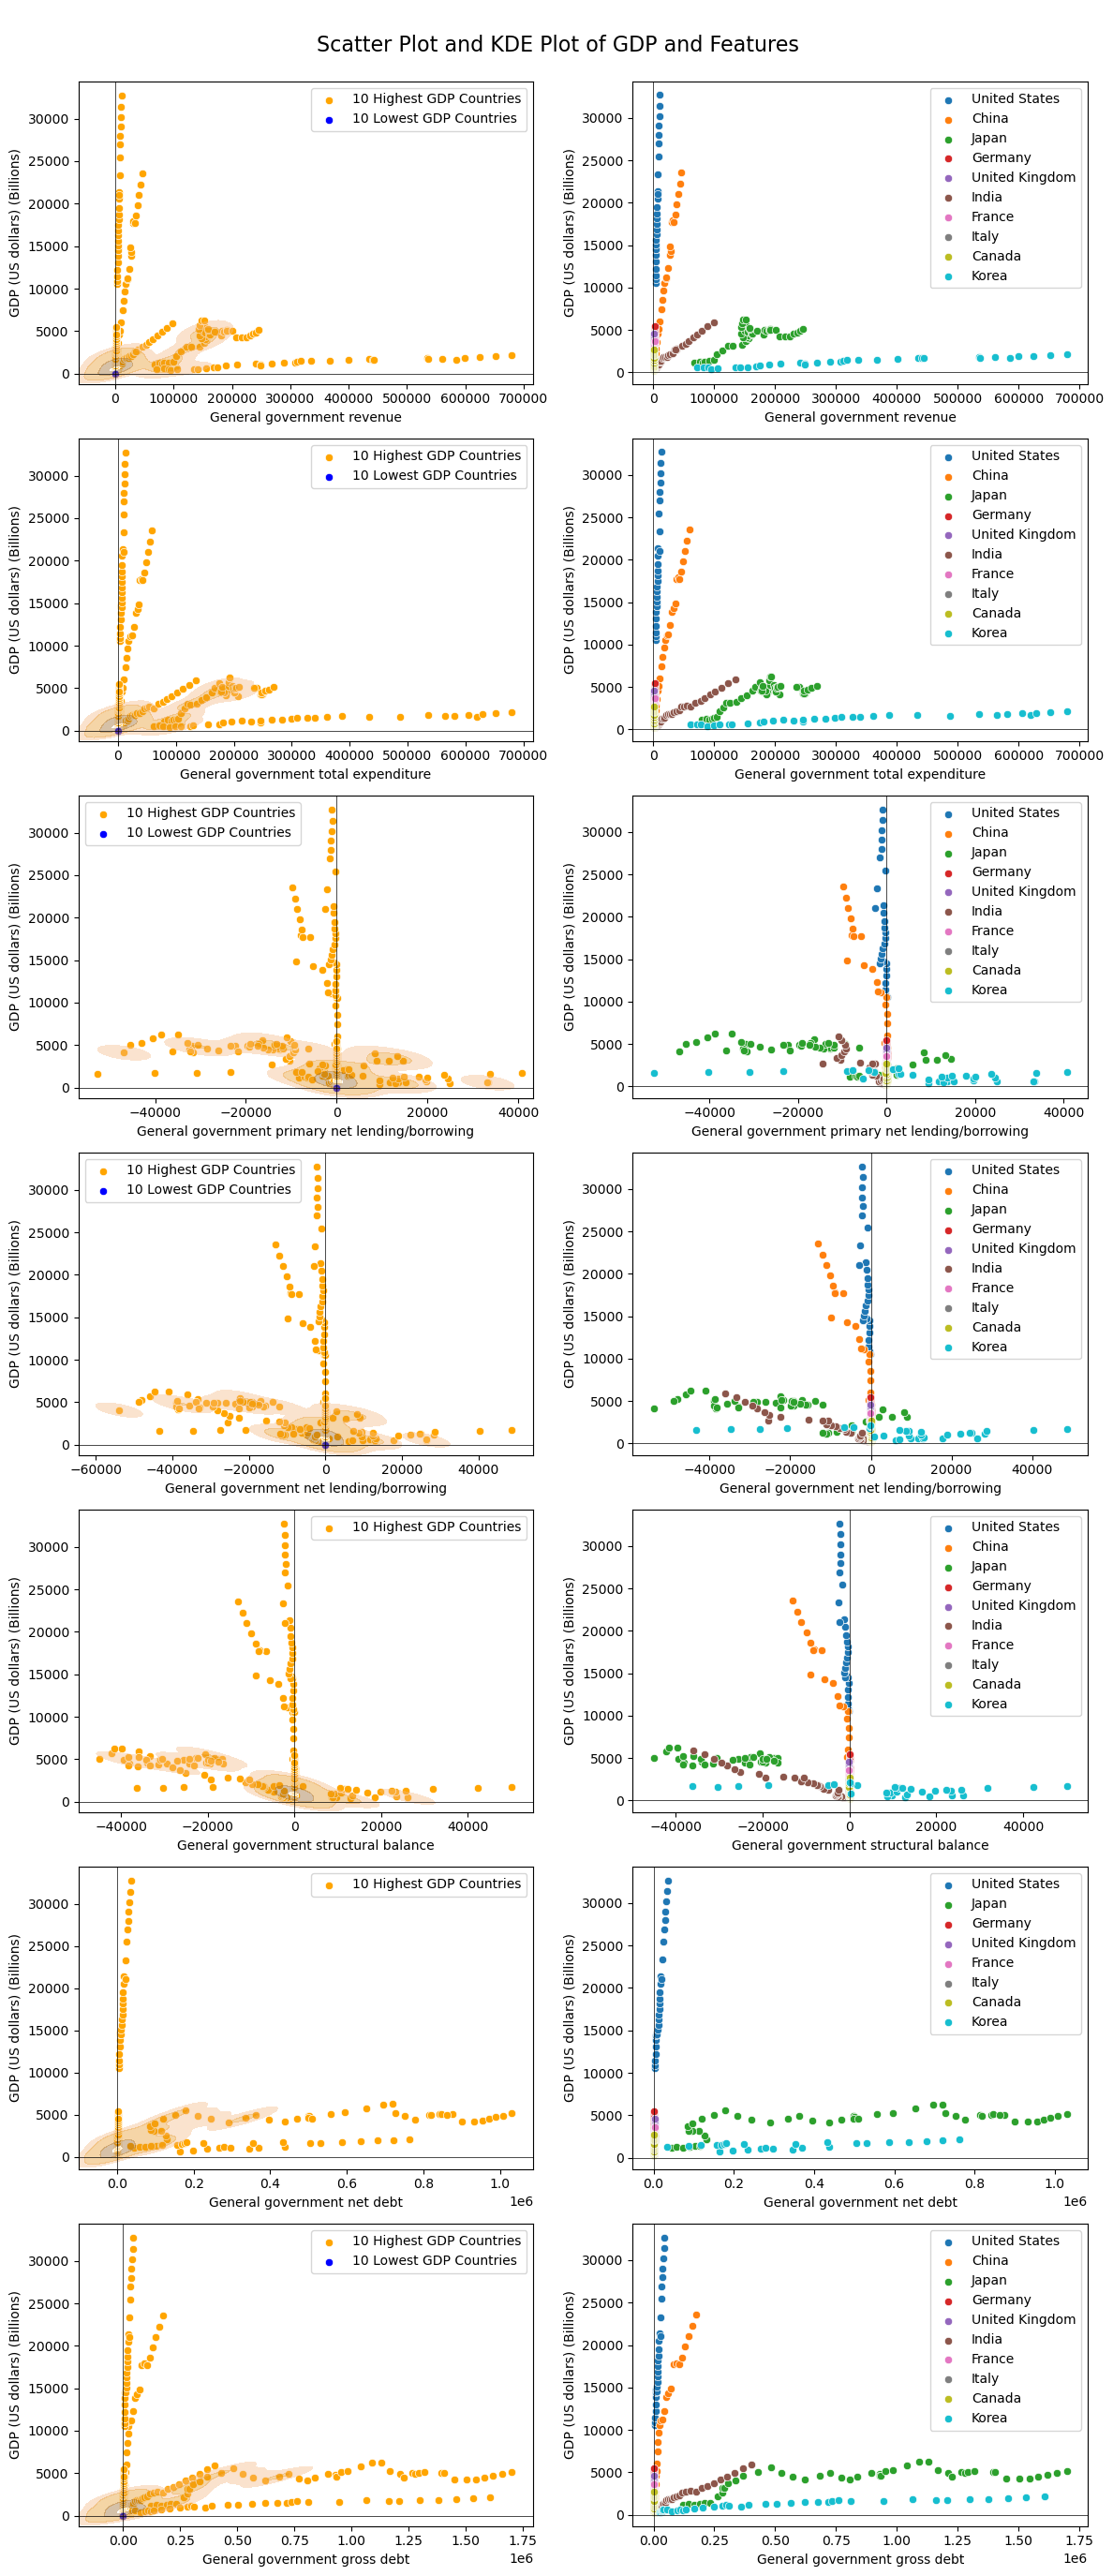

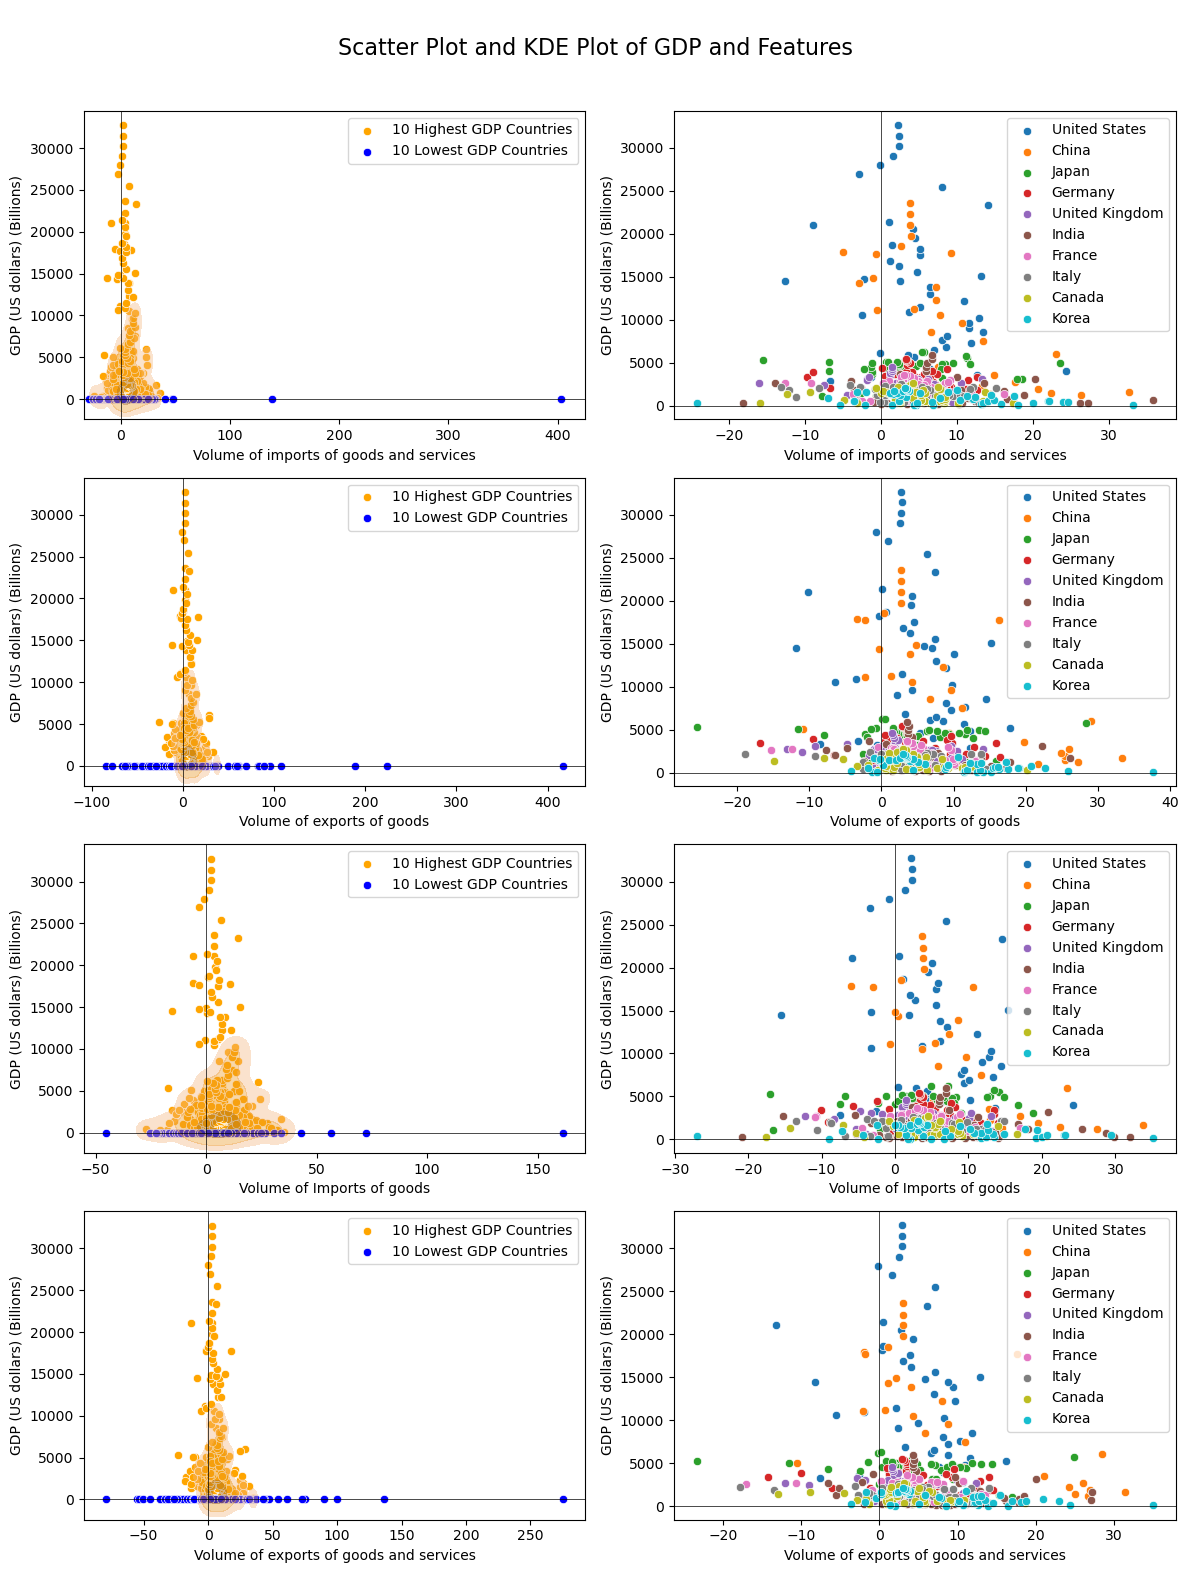

In [17]:
for cat in col_set_arr:
    plot_col_num = len(cat)
    fig, ax = plt.subplots(plot_col_num, 2, figsize=(12, plot_col_num*4))

    for i in range(plot_col_num):
        for j in range(2):
            if j == 0:
                sns.scatterplot(data=plot_data[plot_data['country'].apply(lambda x: x in high_gdp_2020_country_list)], x=cat[i], y='Gross domestic product, current prices.1', ax=ax[i, j], label='10 Highest GDP Countries', color='orange')
                sns.scatterplot(data=plot_data[plot_data['country'].apply(lambda x: x in low_gdp_2020_country_list)], x=cat[i], y='Gross domestic product, current prices.1', ax=ax[i, j], label='10 Lowest GDP Countries', color='blue')
                sns.kdeplot(data=plot_data[(plot_data['country'].apply(lambda x: x in high_gdp_2020_country_list)) & (plot_data['year'] <= 2000)], x=cat[i], y='Gross domestic product, current prices.1', ax=ax[i, j], levels=[0.01, 0.1, 0.5, 0.9], fill=True, alpha=0.4, color='orange')
            else:
                for country in high_gdp_2020_country_list:
                    sns.scatterplot(data=plot_data[plot_data['country'] == country], x=cat[i], y='Gross domestic product, current prices.1', ax=ax[i, j], label=country)
            ax[i, j].axhline(0, color='black', linewidth=0.5)
            ax[i, j].axvline(0, color='black', linewidth=0.5)
            # set y-axis label
            ax[i, j].set_ylabel('GDP (US dollars) (Billions)')
    fig.suptitle('\nScatter Plot and KDE Plot of GDP and Features\n\n', fontsize=16)
    plt.tight_layout()

In [18]:
fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = plot_data[plot_data['year'] == 1990]['Gross domestic product, current prices.1'],
                   colorscale = 'Electric',
                   showscale = True,
                   cmin = 0,
                   cmax = 7000),
        dimensions = list([
            dict(range = [0, 22000],
               #   constraintrange = [100000,150000],
                 label = "1990 GDP", values = plot_data[plot_data['year'] == 1990]['Gross domestic product, current prices.1']),
            dict(range = [0, 22000],
                 label = '2000 GDP', values = plot_data[plot_data['year'] == 2000]['Gross domestic product, current prices.1']),
            dict(#tickvals = [0,0.5,1,2,3],
                 #ticktext = ['A','AB','B','Y','Z'],
                 range = [0, 22000],
                 label = '2010 GDP', values = plot_data[plot_data['year'] == 2010]['Gross domestic product, current prices.1']),
            dict(range = [0, 22000],
                 #tickvals = [0,1,2,3],
                 label = '2020 GDP', values = plot_data[plot_data['year'] == 2020]['Gross domestic product, current prices.1'])
        ])
    )
)
fig.show()

In [19]:
plot_data[plot_data['year'] == 2020][['Gross domestic product, current prices.1', 'Gross domestic product, current prices.2', 'Gross domestic product per capita, current prices.1', 'Gross domestic product per capita, current prices.2']].describe()

Gross domestic product, current prices.1  \
count                                194.000000   
mean                                 437.931918   
std                                 1925.964119   
min                                    0.052000   
25%                                    9.789750   
50%                                   34.581500   
75%                                  209.067250   
max                                21060.450000   

       Gross domestic product, current prices.2  \
count                                194.000000   
mean                                 687.862412   
std                                 2478.644621   
min                                    0.051000   
25%                                   24.144500   
50%                                   80.469000   
75%                                  397.943250   
max                                24196.270000   

       Gross domestic product per capita, current prices.1  \
count                                         194.000000     
mean                                        13899.150613     
std                                         18946.219994     
min                                           259.906000     
25%                                          2107.837500     
50%                                          5321.030000     
75%                                         16864.045000     
max                                        117616.150000     

       Gross domestic product per capita, current prices.2  
count                                         194.000000    
mean                                        21218.029082    
std                                         21619.085464    
min                                           408.346000    
25%                                          5205.845000    
50%                                         13463.780000    
75%                                         31577.000000    
max                                        119926.740000

In [20]:
fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = plot_data[plot_data['year'] == 2020]['Gross domestic product, current prices.1'],
                   colorscale = 'Earth',
                   showscale = True,
                   cmin = 0,
                   cmax = 20000),
        dimensions = list([
            dict(range = [0, 22000],
                 label = "2020 GDP", values = plot_data[plot_data['year'] == 2020]['Gross domestic product, current prices.1']),
            dict(range = [0, 25000],
                 label = '2020 GDP PPP', values = plot_data[plot_data['year'] == 2020]['Gross domestic product, current prices.2']),
            dict(range = [200, 120000],
                 label = '2020 GDP per capita', values = plot_data[plot_data['year'] == 2020]['Gross domestic product per capita, current prices.1']),
            dict(range = [400, 120000],
                 label = '2020 GDP per capita PPP', values = plot_data[plot_data['year'] == 2020]['Gross domestic product per capita, current prices.2'])
        ])
    )
)
fig.show()

In [21]:
# count number of countries in the dataset
plot_data.groupby('country').count().shape[0]

196

In [22]:
fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = plot_data[plot_data['year'] == 2020]['Gross domestic product, current prices.1'].rank(),
                   colorscale = 'Earth',
                   colorbar = dict(title = '2020 GDP Rank'),
                   showscale = True,
                   cmin = 1,
                   cmax = 196),
        dimensions = list([
            dict(range = [1, 196],
                 constraintrange = [[166,196], [1, 30]],
                 label = "GDP Rank of 2020", values = plot_data[plot_data['year'] == 2020]['Gross domestic product, current prices.1'].rank()),
            dict(range = [1, 196],
                 label = 'GDP PPP Rank of 2020', values = plot_data[plot_data['year'] == 2020]['Gross domestic product, current prices.2'].rank()),
            dict(range = [1, 196],
                 label = 'GDP per capita Rank of 2020', values = plot_data[plot_data['year'] == 2020]['Gross domestic product per capita, current prices.1'].rank()),
            dict(range = [1, 196],
                 label = 'GDP per capita PPP Rank of 2020', values = plot_data[plot_data['year'] == 2020]['Gross domestic product per capita, current prices.2'].rank())
        ])
    )
)
# Add title
fig.update_layout(title_text='Parallel Coordinates Plot of 2020 GDP and GDP per capita Rank of All Countries\n\n\n', title_x=0.5)
fig.show()

In [23]:
model_data = plot_data.copy()
model_data[num_col_name] = MinMaxScaler().fit_transform(model_data[num_col_name])
model_data.describe()

year  country_code  Gross domestic product, constant prices  \
count  9604.000000   9604.000000                              8737.000000   
mean   2004.000000    551.377551                                 0.007247   
std      14.142872    261.496377                                 0.058070   
min    1980.000000    111.000000                                 0.000000   
25%    1992.000000    313.750000                                 0.000002   
50%    2004.000000    565.500000                                 0.000025   
75%    2016.000000    733.250000                                 0.000213   
max    2028.000000    968.000000                                 1.000000   

       Gross domestic product, constant prices.1  \
count                                8720.000000   
mean                                    0.284934   
std                                     0.029691   
min                                     0.000000   
25%                                     0.275156   
50%                                     0.285329   
75%                                     0.296368   
max                                     1.000000   

       Gross domestic product, current prices  \
count                            8.693000e+03   
mean                             6.368441e-04   
std                              1.705736e-02   
min                              0.000000e+00   
25%                              2.954178e-08   
50%                              4.833868e-07   
75%                              5.046891e-06   
max                              1.000000e+00   

       Gross domestic product, current prices.1  \
count                               8770.000000   
mean                                   0.009300   
std                                    0.045670   
min                                    0.000000   
25%                                    0.000110   
50%                                    0.000566   
75%                                    0.003458   
max                                    1.000000   

       Gross domestic product, current prices.2  \
count                               8800.000000   
mean                                   0.010347   
std                                    0.044303   
min                                    0.000000   
25%                                    0.000193   
50%                                    0.000982   
75%                                    0.005160   
max                                    1.000000   

       Gross domestic product, deflator  \
count                      8.716000e+03   
mean                       1.638961e-04   
std                        1.130591e-02   
min                        0.000000e+00   
25%                        8.906598e-15   
50%                        1.699885e-14   
75%                        2.378039e-14   
max                        1.000000e+00   

       Gross domestic product per capita, constant prices  \
count                                        8638.000000    
mean                                            0.010447    
std                                             0.062238    
min                                             0.000000    
25%                                             0.000073    
50%                                             0.000236    
75%                                             0.001611    
max                                             1.000000    

       Gross domestic product per capita, constant prices.1  ...   Population  \
count                                        8681.000000     ...  8740.000000   
mean                                            0.105578     ...     0.023412   
std                                             0.122661     ...     0.088343   
min                                             0.000000     ...     0.000000   
25%                                             0.018905     ...     0.001180   
50%                                             0.059548     ... 

In [24]:
high_corr_index_name = []
high_corr_matrix = pd.DataFrame()
for col in corr_matrix:
    high_corr_matrix[col] = corr_matrix[col].apply(lambda x: True if (x >= 0.9 and x != 1) or (x <= -0.9 and x != -1) else False)

index_name = set() 
for col in high_corr_matrix.columns:
    for index in high_corr_matrix[col][high_corr_matrix[col] == True].index.to_list():
        if index in index_name:
            continue
        else:
            print(col, '---', index)
            high_corr_index_name.append(index)
        index_name.add(col)
        index_name.add(index)
print(high_corr_index_name)

Implied PPP conversion rate --- General government revenue
Implied PPP conversion rate --- General government total expenditure
Implied PPP conversion rate --- General government net lending/borrowing
Implied PPP conversion rate --- General government primary net lending/borrowing
Implied PPP conversion rate --- General government net debt
Implied PPP conversion rate --- General government gross debt
Inflation, average consumer prices --- Inflation, end of period consumer prices
Employment --- Population
General government total expenditure --- General government structural balance
['General government revenue', 'General government total expenditure', 'General government net lending/borrowing', 'General government primary net lending/borrowing', 'General government net debt', 'General government gross debt', 'Inflation, end of period consumer prices', 'Population', 'General government structural balance']


In [25]:
model_data.drop(high_corr_index_name, axis=1, inplace = True)
model_data

year      country  country_code  \
0     1980  Afghanistan           512   
1     1981  Afghanistan           512   
2     1982  Afghanistan           512   
3     1983  Afghanistan           512   
4     1984  Afghanistan           512   
...    ...          ...           ...   
9599  2024     Zimbabwe           698   
9600  2025     Zimbabwe           698   
9601  2026     Zimbabwe           698   
9602  2027     Zimbabwe           698   
9603  2028     Zimbabwe           698   

      Gross domestic product, constant prices  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   
...                                       ...   
9599                                 0.000001   
9600                                 0.000001   
9601                                 0.000001   
9602                                 0.000001   
9603                                 0.000001   

      Gross domestic product, constant prices.1  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   
...                                         ...   
9599                                   0.286046   
9600                                   0.285566   
9601                                   0.284681   
9602                                   0.284315   
9603                                   0.283069   

      Gross domestic product, current prices  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   
...                                      ...   
9599                                0.000849   
9600                                0.001973   
9601                                0.003741   
9602                                0.005596   
9603                                0.007391   

      Gross domestic product, current prices.1  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   
...                                        ...   
9599                                  0.001440   
9600                                  0.001521   
9601                                  0.001544   
9602                                  0.001449   
9603                                  0.001503   

      Gross domestic product, current prices.2  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   
...                                        ...   
9599                                  0.001072   
9600                                  0.001132   
9601                                  0.001193   
9602                                  0.001254   
9603                                  0.001316   

      Gross domestic product, deflator  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                  NaN   
...                                ...   
9599                      4.384768e-10   
9600                      9.849686e-10   
9601                      1.807320e-09   
9602                      2.618399e-09   
9603                      3.357191e-09   

      Gross domestic produc

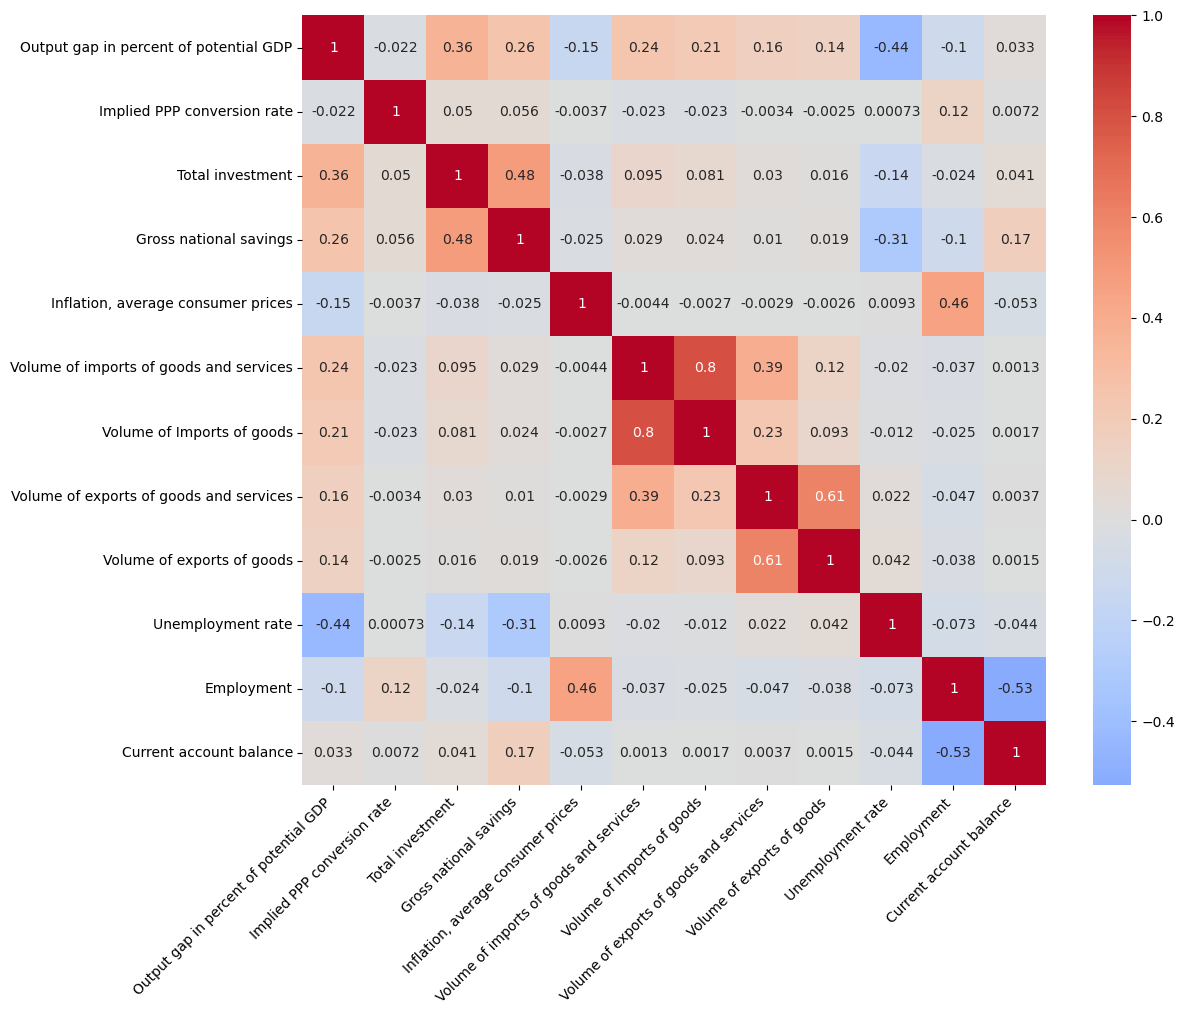

In [26]:
not_gdp_num_col_name = []
for col in model_data.columns:
    if model_data[col].dtypes == 'float':
        if 'Gross domestic product' not in col:
            not_gdp_num_col_name.append(col)

corr_matrix_preprocess = model_data[not_gdp_num_col_name].corr()
# draw the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_preprocess, annot=True, cmap='coolwarm', center=0)
plt.xticks(rotation=45, ha='right')
plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

In [28]:
model_data = model_data.dropna(subset=["Gross domestic product, current prices.1"])

pred_data = model_data[model_data['year'] >= 2022]
test_data = model_data[model_data['year'] >= 2018]
test_data = test_data[test_data['year'] < 2022]
train_data = model_data[model_data['year'] < 2018]

In [29]:
x_col_name = not_gdp_num_col_name.copy()
x_col_name.append('country_code')

X_train = train_data[x_col_name].copy()
y_train = train_data['Gross domestic product, current prices.1'].copy()

X_test = test_data[x_col_name].copy()
y_test = test_data['Gross domestic product, current prices.1'].copy()

X_pred = pred_data[x_col_name].copy()
y_pred = pred_data['Gross domestic product, current prices.1'].copy()

In [30]:
import re
# print(lambda x: re.sub('[^A-Za-z0-9_]+','',x))
X_train.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+','_',x), inplace=True)
X_test.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+','_',x), inplace=True)
X_pred.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+','_',x), inplace=True)

In [31]:
X_train.columns

Index(['Output_gap_in_percent_of_potential_GDP', 'Implied_PPP_conversion_rate',
       'Total_investment', 'Gross_national_savings',
       'Inflation_average_consumer_prices',
       'Volume_of_imports_of_goods_and_services', 'Volume_of_Imports_of_goods',
       'Volume_of_exports_of_goods_and_services', 'Volume_of_exports_of_goods',
       'Unemployment_rate', 'Employment', 'Current_account_balance',
       'country_code'],
      dtype='object')

In [32]:
X_train.dtypes

Output_gap_in_percent_of_potential_GDP     float64
Implied_PPP_conversion_rate                float64
Total_investment                           float64
Gross_national_savings                     float64
Inflation_average_consumer_prices          float64
Volume_of_imports_of_goods_and_services    float64
Volume_of_Imports_of_goods                 float64
Volume_of_exports_of_goods_and_services    float64
Volume_of_exports_of_goods                 float64
Unemployment_rate                          float64
Employment                                 float64
Current_account_balance                    float64
country_code                                 int64
dtype: object

In [33]:
model = lgb.LGBMRegressor()

param_grid = {
    # 'n_estimators': [80, 100, 200, 300]
    'n_estimators': [100],
    # 'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'learning_rate': [0.3],
    # 'max_depth': [3, 4, 5, 6],
    'max_depth': [4],
    # Add other parameters if needed
    # 'num_leaves': [10, 20, 30],
    'num_leaves': [20],
    # 'min_child_samples': [3, 7, 10],
    'min_child_samples': [7],
    # 'subsample': [0.8, 0.9, 1],
    'subsample': [0.8],
    # 'colsample_bytree': [0.8, 0.9, 1],
    'colsample_bytree': [0.9],
    'alpha': [0.1, 0.5, 1],
    'lambda': [0.1, 0.5, 1],
    'reg_alpha': [0.1, 0.5, 1],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2, error_score="raise")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")

Fitting 2 folds for each of 27 candidates, totalling 54 fits
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1. Current value: lambda_l2=0.1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000672 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3257
[LightGBM] [Info] Number of data points in the train set: 6669, number of used features: 13
[LightGBM] [Info] Start training from score 0.006889
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

In [34]:
# get the score of the best model and print it
best_model = grid_search.best_estimator_
print(best_model.score(X_train, y_train))
print(best_model.score(X_test, y_test))
print(best_model.score(X_pred, y_pred))

[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1. Current value: lambda_l2=0.1
0.9931591678785364
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1. Current value: lambda_l2=0.1
0.8598040083523047
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1. Current value: lambda_l2=0.1
0.5140348233883888


In [35]:
pred_data_CN = pred_data[pred_data['country'] == 'China']
X_pred_CN = pred_data_CN[x_col_name].copy()
y_pred_CN = pred_data_CN['Gross domestic product, current prices.1'].copy()

print(best_model.score(X_pred_CN, y_pred_CN))
# get the prediction of the best model
y_pred_CN_model = best_model.predict(X_pred_CN)
print(y_pred_CN)
print(y_pred_CN_model)

[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1. Current value: lambda_l2=0.1
-37.262845916367795
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1. Current value: lambda_l2=0.1
1806    0.547144
1807    0.541471
1808    0.567751
1809    0.605123
1810    0.644221
1811    0.681884
1812    0.722196
Name: Gross domestic product, current prices.1, dtype: float64
[0.3168877  0.32125956 0.3214493  0.17708065 0.17708065 0.17708065
 0.17708065]


In [36]:
pred_data_USA = pred_data[pred_data['country'] == 'United States']
X_pred_USA = pred_data_USA[x_col_name].copy()
y_pred_USA = pred_data_USA['Gross domestic product, current prices.1'].copy()

print(best_model.score(X_pred_USA, y_pred_USA))
# get the prediction of the best model
y_pred_USA_model = best_model.predict(X_pred_USA)
print(y_pred_USA)
print(y_pred_USA_model)

[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1. Current value: lambda_l2=0.1
-78.39911045399396
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1. Current value: lambda_l2=0.1
9156    0.778906
9157    0.824391
9158    0.855498
9159    0.888607
9160    0.924550
9161    0.961411
9162    1.000000
Name: Gross domestic product, current prices.1, dtype: float64
[0.53067827 0.52275267 0.52275267 0.13647213 0.13719596 0.13611997
 0.13594196]


[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1. Current value: lambda_l2=0.1
[LightGBM] [Warning] lam

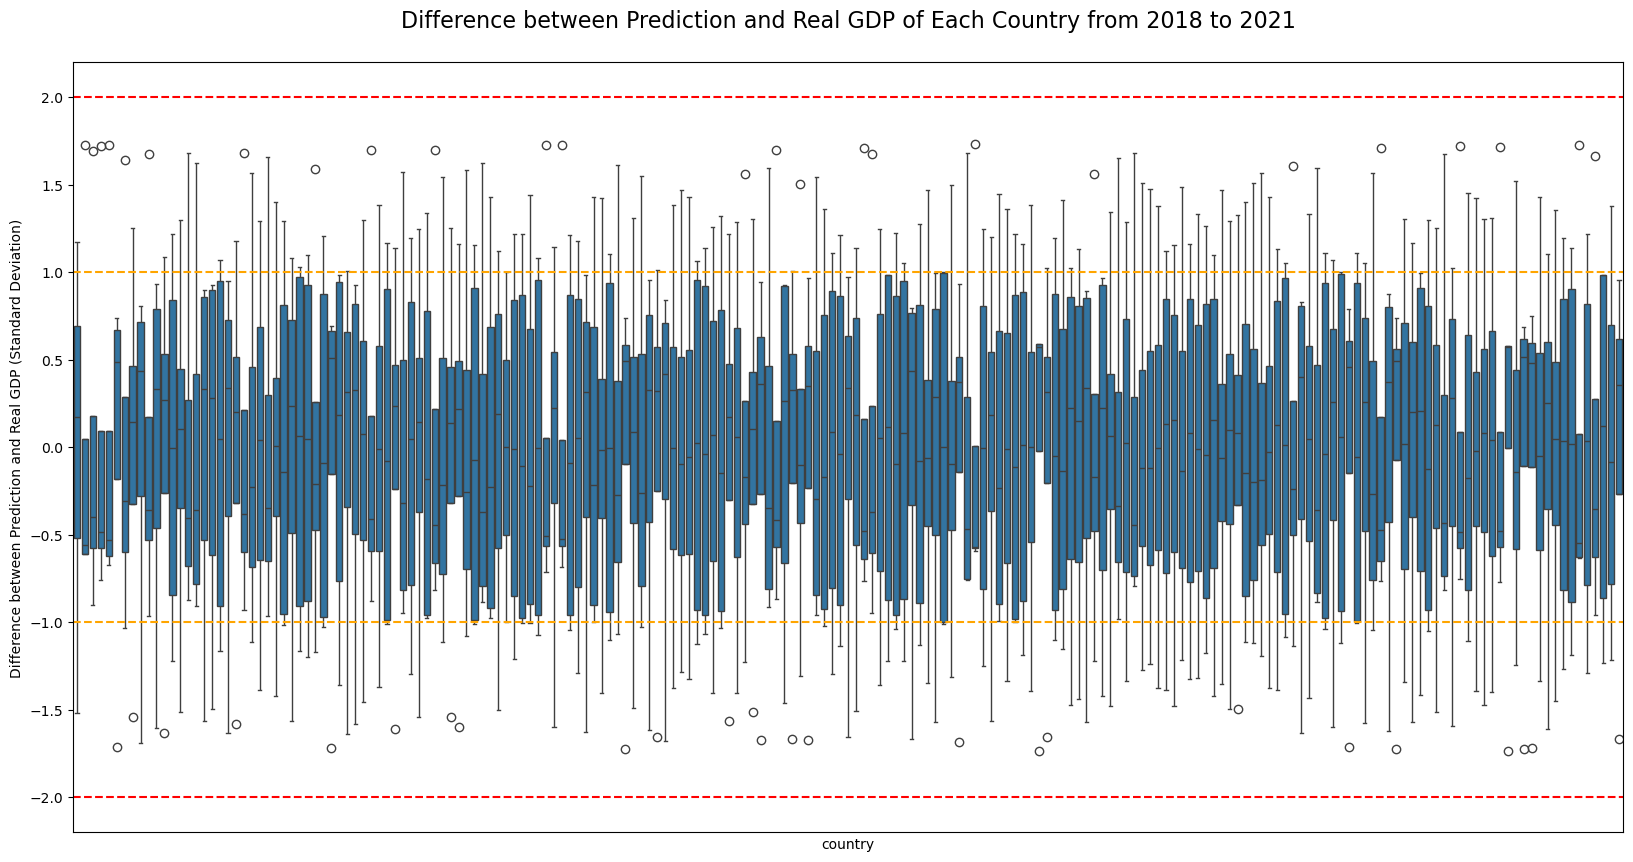

In [92]:
test_rest_data = pd.DataFrame()
for country in test_data['country'].unique():
    test_data_country = test_data[test_data['country'] == country]
    X_test_country = test_data_country[x_col_name].copy()
    y_test_country = test_data_country['Gross domestic product, current prices.1'].copy()
    # print(country, best_model.score(X_test_country, y_test_country))
    # print(country, best_model.predict(X_test_country), y_test_country)
    rst = best_model.predict(X_test_country) - y_test_country.to_list()
    z_score = (rst - np.mean(rst)) / np.std(rst)
    # concat the diff list and the country name to the test_rest_data
    test_rest_data = pd.concat([test_rest_data, pd.DataFrame({'country': [country]*len(y_test_country), 'diff': z_score})])

# plot the diff in boxplot with sns
plt.figure(figsize=(20, 10))
sns.boxplot(data=test_rest_data, x='country', y='diff')
# add y=1 and y=-1 line
plt.axhline(1, color='orange', linestyle='--')
plt.axhline(-1, color='orange', linestyle='--')
# add y=2 and y=-2 line
plt.axhline(2, color='red', linestyle='--')
plt.axhline(-2, color='red', linestyle='--')
# hide the x-axis label
plt.xticks([])
# add y tick label
# plt.yticks([5, 2.5, 0, -2.5, -5, -10, -20, -30, -40])
# add y-axis label
plt.ylabel('Difference between Prediction and Real GDP (Standard Deviation)')
# add title
plt.title('Difference between Prediction and Real GDP of Each Country from 2018 to 2021\n', fontsize=16)
plt.show()

In [109]:
pred_rest_data = pd.DataFrame()
for country in pred_data['country'].unique():
    pred_data_country = pred_data[pred_data['country'] == country]
    X_pred_country = pred_data_country[x_col_name].copy()
    y_pred_country = pred_data_country['Gross domestic product, current prices.1'].copy()
    # print(country, best_model.score(X_test_country, y_test_country))
    # print(country, best_model.predict(X_test_country), y_test_country)
    rst = best_model.predict(X_pred_country) - y_pred_country.to_list()
    z_score = (rst - np.mean(rst)) / np.std(rst)
    if abs(np.percentile(z_score, 75)) >= 1 or abs(np.percentile(z_score, 25)) >= 1:
        # concat the diff list and the country name to the pred_rest_data
        pred_rest_data = pd.concat([pred_rest_data, pd.DataFrame({'country': [country]*len(y_pred_country), 'diff': z_score})], ignore_index=True)

# sort the pred_rest_data by the median of diff of each country
pred_rest_data['diff'] = pred_rest_data['diff'].apply(lambda x: round(x, 5))
pred_rest_data['country'] = pd.Categorical(pred_rest_data['country'], categories=pred_rest_data.groupby('country').median().sort_values(by='diff').index, ordered=True)
pred_rest_data = pred_rest_data.sort_values(by='country')

# print(pred_rest_data)
# # plot the diff in boxplot with sns
# plt.figure(figsize=(10, 5))
# sns.boxplot(data=pred_rest_data, x='country', y='diff')
# # add y=5 and y=-5 line
# plt.axhline(1, color='red', linestyle='--')
# plt.axhline(-1, color='red', linestyle='--')
# # hide the x-axis label
# # plt.xticks([])
# plt.xticks(rotation=45, ha='right')
# plt.show()

# use plotly to plot the diff in boxplot
fig = px.box(pred_rest_data, x='country', y='diff', title='Prediction Difference of GDP of All Countries')
# add y=0 line
fig.add_shape(type='line', x0=-0.5, y0=0, x1=24.5, y1=0, line=dict(color='red', width=1))
# add y=1 and y=-1 line
fig.add_shape(type='line', x0=-0.5, y0=1, x1=24.5, y1=1, line=dict(color='red', width=1, dash='dash'))
fig.add_shape(type='line', x0=-0.5, y0=-1, x1=24.5, y1=-1, line=dict(color='red', width=1, dash='dash'))
# add y tick label
fig.update_yaxes(tickvals=[2, 1.5, 1, 0.5, 0, -0.5, -1, -1.5, -2])
fig.update_layout(title_text='Standard Deviation of GDP Prediction from 2022 to 2028 that Upper or Bottom Quartile Exceed 1', title_x=0.5, xaxis_title='Country', yaxis_title='Difference (Standard Deviation)', width=1000, height=600)
fig.show()

[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1. Current value: lambda_l2=0.1
[LightGBM] [Warning] lam

[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1. Current value: lambda_l2=0.1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3257
[LightGBM] [Info] Number of data points in the train set: 6669, number of used features: 13
[LightGBM] [Info] Start training from score 0.006889
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

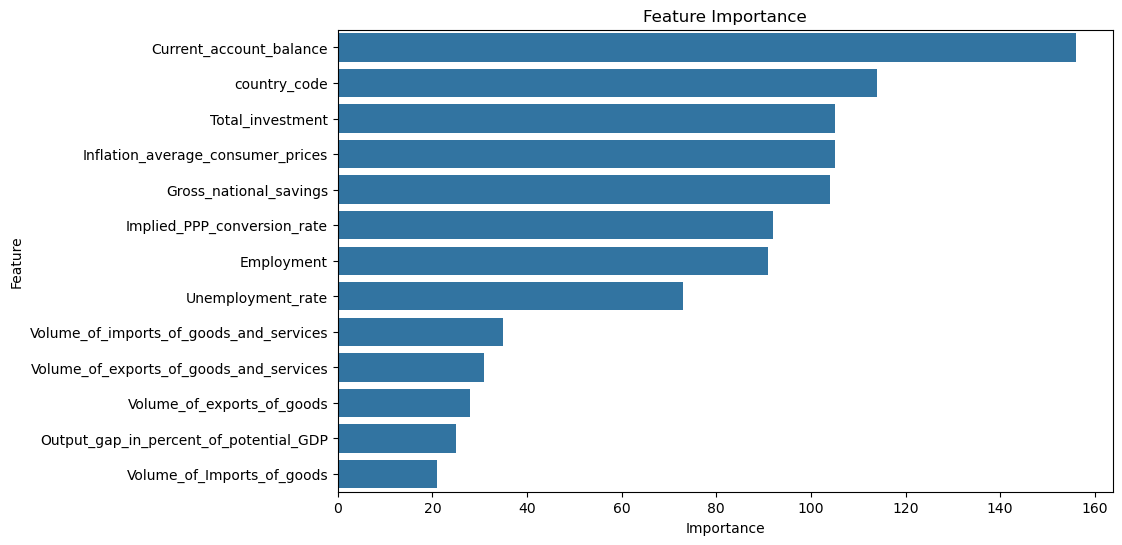

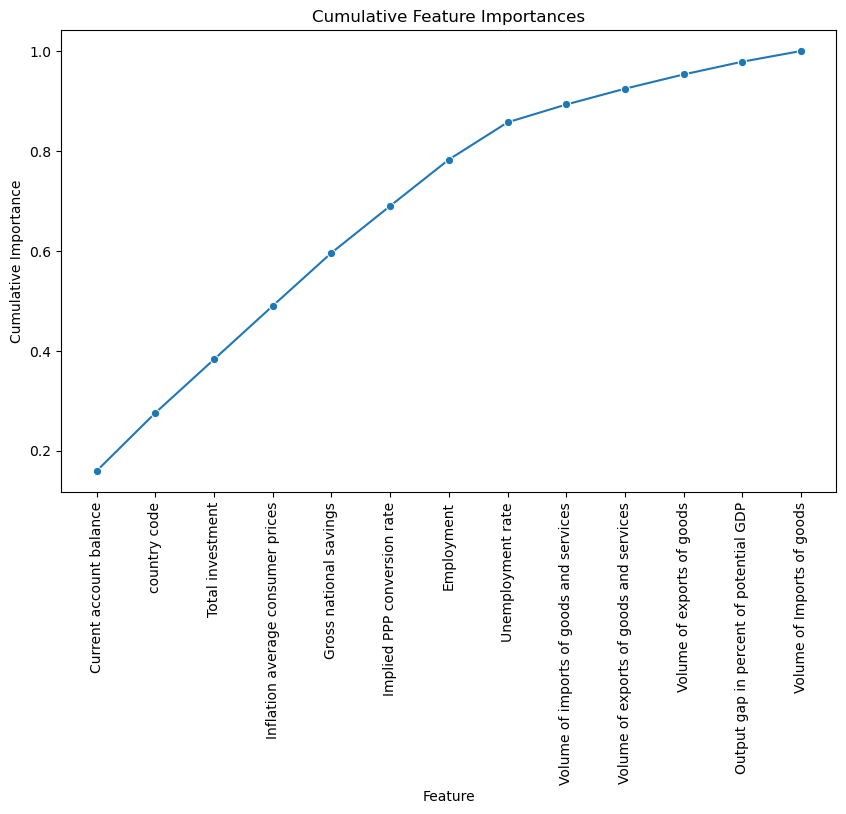

In [116]:
best_model.fit(X_train, y_train)

# Get feature importances
feature_importances = best_model.feature_importances_

# Convert feature importances into a DataFrame
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame to find out the most important features
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Visualization 1: Bar Plot of Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importances_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

feature_importances_df['Importance'] = feature_importances_df['Importance'] / feature_importances_df['Importance'].sum() * 100
feature_importances_df['Feature'] = feature_importances_df['Feature'].replace('_', ' ', regex=True)
fig = px.bar(feature_importances_df, y='Feature', x='Importance', text_auto='.2s',
            title="Feature Importances for GDP Prediction Model", labels={'Importance': 'Percentage (%)', 'Feature': 'Feature Name'})
fig.update_layout(width=1000, height=600)
fig.show()

# Visualization 2: Plotting feature importances cumulatively
feature_importances_df['Cumulative Importance'] = feature_importances_df['Importance'].cumsum() / feature_importances_df['Importance'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(data=feature_importances_df, x='Feature', y='Cumulative Importance', marker='o')
plt.xticks(rotation=90)
plt.title('Cumulative Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Cumulative Importance')
plt.show()